# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For randomized data splitting
from sklearn.model_selection import train_test_split

from scipy import stats 

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
pip install -U matplotlib 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Loading the dataset

In [ ]:
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

Data = pd.read_csv(io.BytesIO(uploaded['used_device_data.csv']))

Saving used_device_data.csv to used_device_data (1).csv


## Data Overview

- Observations
- Sanity checks

In [ ]:
# copying data as best practice
data = Data.copy()

In [ ]:
# checking the shape of the data
data.shape

(3454, 15)



*   There are 3454 rows and 15 columns in our data.



In [ ]:
# getting statistical summary of data
data.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841




*   The average for screen_size, main_camera, selfie_camera_mp, int_memory, ram, battery, weight, release_year, days_used, normalized_used_price, normalized_used_price is 13.7cm, 9.46 megapixels, 6.55 megapixels, 54.57 GB, 4.03 GB, 3133.30 mAh, 182.75 grams, 2015.96 year, 674.87 days, 4.36 euros, and 5.23 euros respectively.  



In [ ]:
# checking the first 5 rows of the data
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
# checking the last 5 rows of the data
data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994




*   After looking at the last 5 rows, we can see that Nan exists and that is something we'll have to treat further on. 


In [ ]:
# checking column types and number of values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f



* There are 11 numeric columns and 4 categorical type columns. 
* There are 9 (float64), 2 (int64), and 4 (object) types. 
* The categorical variables are brand_name, os, 4g, and 5g.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
# created histogram and violinplot function to repeat plotting process for EDA on variables 
def histogram_violinplot(data, column, figsize=(20,15), kde=False):

  plots, (sub_violin, sub_hist) = plt.subplots(
       nrows=2, 
       sharex=True,  
       gridspec_kw={"height_ratios": (0.25, 0.75)},
       figsize=figsize,
  )
  # setting style of background
  sns.set(style="darkgrid")
  # plotting a violin plot to show distribution
  sns.violinplot(
        data=data, x=column, kde=kde, ax=sub_violin, showmeans = True, palette="Blues"
  )
  # plotting a histogram to show distribution 
  sns.histplot(
        data=data, x=column, kde=kde, ax=sub_hist, palette ="Blues"
  )
  # puts line through the median of violinplot 
  sub_violin.axvline(
      data[column].median(), color = "purple", linestyle = "-"
  )
  # puts line through mean of histplot 
  sub_hist.axvline(
      data[column].median(), color = "purple", linestyle = "-"
  )
  # puts line through the median of violinplot 
  sub_violin.axvline(
       data[column].mean(), color = "red", linestyle = "--"
  )
  # puts line through mean of histplot 
  sub_hist.axvline(
       data[column].mean(), color = "red", linestyle = "--"
  )
    
     

In [ ]:
# converts y axis to percentages for specific columns 
def percentage_barplot(data, column, figsize=(40,10)):
  percentage_counts = data[column].value_counts(normalize = True)
  fig, ax = plt.subplots(figsize=(40,10))
  ax.bar(percentage_counts.index, 
         percentage_counts, 
         color = ['blue', 'royalblue', 'dodgerblue', 'deepskyblue',
                  'cyan', 'aquamarine', 'springgreen', 'lime', 'forestgreen', 'lightgreen',
                  'yellow', 'gold', 'orange', 'peru', 'coral', 'lightcoral', 
                  'lightgrey', 'black'])
  #if the column isn't brand name, show the value counts with percentages
  if(column != 'brand_name'):
    counts = data[column].value_counts()
    new_df = pd.concat([counts, percentage_counts], axis = 1)
    new_df = new_df.set_axis(["Counts", "Percentage"], axis = 1 )
    return new_df


Screen Size in CM

count    3454.000000
mean       13.713115
std         3.805280
min         5.080000
25%        12.700000
50%        12.830000
75%        15.340000
max        30.710000
Name: screen_size, dtype: float64


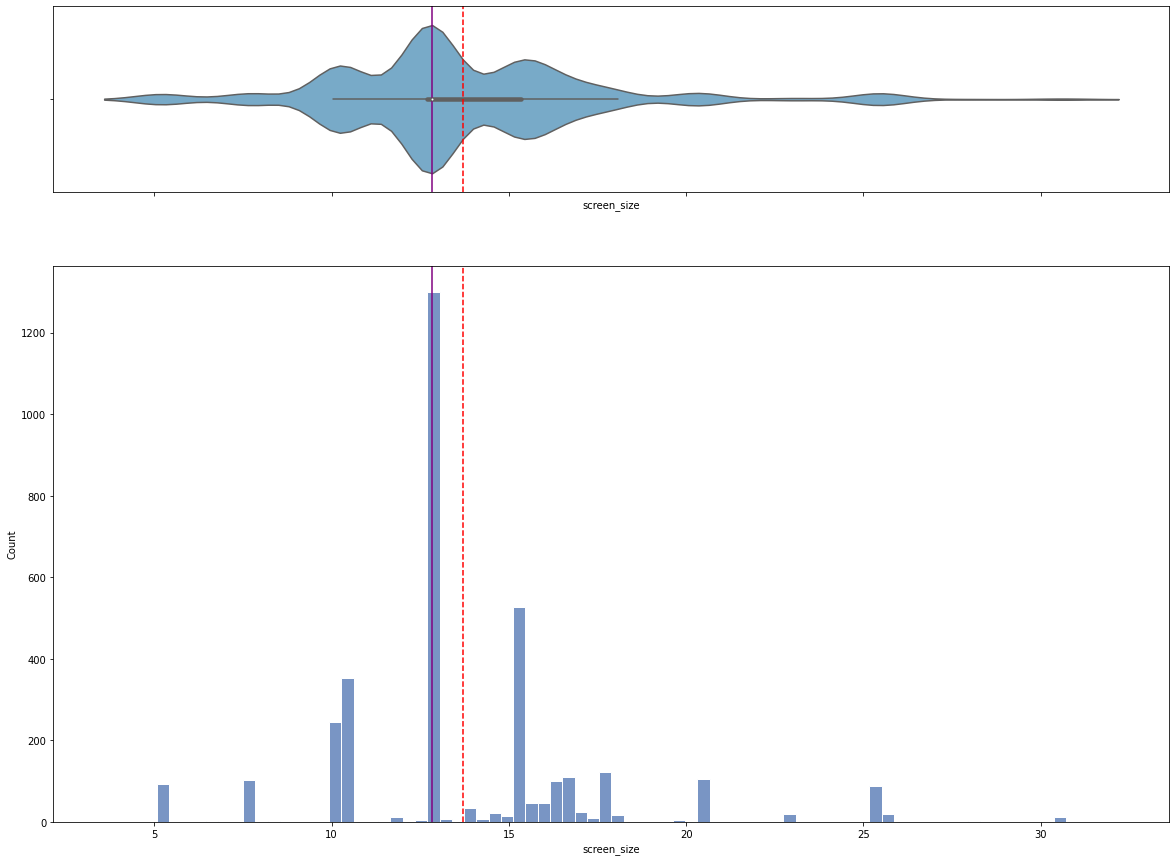

In [ ]:
# plots histogram and violinplot for screen_size
histogram_violinplot(data, 'screen_size')
print(data['screen_size'].describe()) 



*   The mean of the screen size is 13.71 and median is 12.83. Based on the density of the violinplot, there is higher probability that values of screen size will fall between 11 and 13.71 cm. 



Main Camera (Rear Camera) in Mega Pixels

count    3275.000000
mean        9.460208
std         4.815461
min         0.080000
25%         5.000000
50%         8.000000
75%        13.000000
max        48.000000
Name: main_camera_mp, dtype: float64


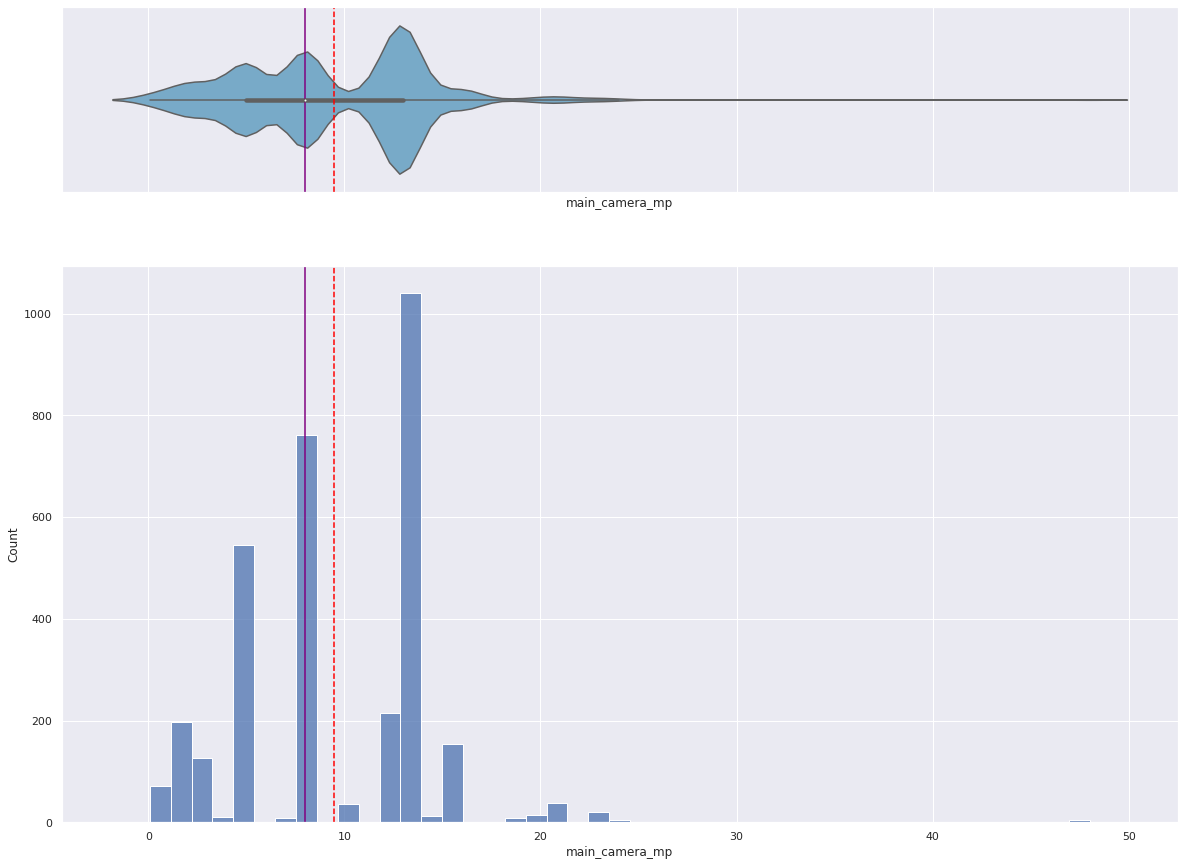

In [ ]:
# plots histogram and violinplot on same graph for main_camera
histogram_violinplot(data, 'main_camera_mp')
print(data['main_camera_mp'].describe()) 



*   The mean of main_camera_mp is 9.46020 cm and median is 8.0 cm. There is a high probability that values will take on 13cm as higher density is seen from the violinplot. Just by seeing the plot, there are outliers in the data.


Selfie Camera (Front Camera) in Mega Pixels

count    3452.000000
mean        6.554229
std         6.970372
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        32.000000
Name: selfie_camera_mp, dtype: float64


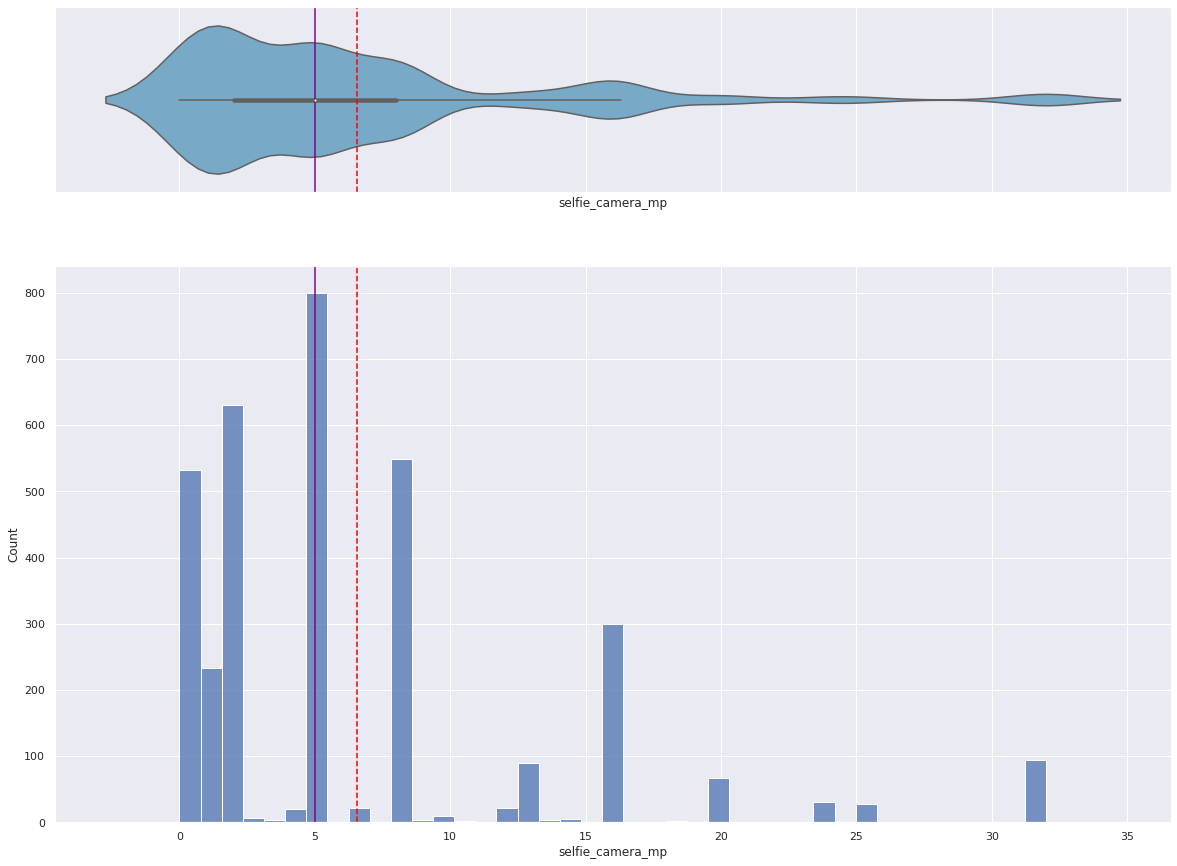

In [ ]:
# plots histogram and violinplot on same graph for selfie_camera_mp
histogram_violinplot(data, 'selfie_camera_mp')
print(data['selfie_camera_mp'].describe()) 



*   The mean of selfie camera is 6.55 cm and median is 5.00 cm. 


Internal Memory (ROM) in GB

count    3450.000000
mean       54.573099
std        84.972371
min         0.010000
25%        16.000000
50%        32.000000
75%        64.000000
max      1024.000000
Name: int_memory, dtype: float64


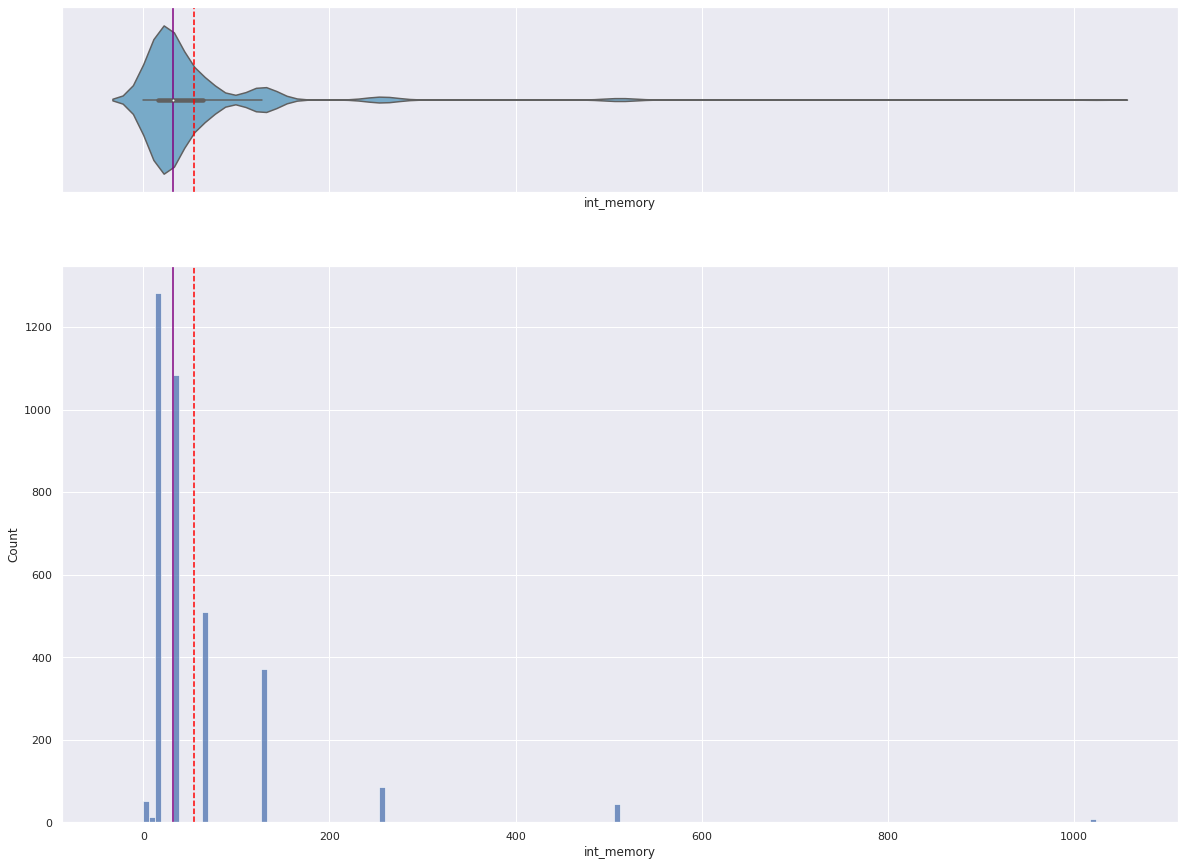

In [ ]:
# plots histogram and violinplot on same graph for int_memory
histogram_violinplot(data, 'int_memory')
print(data['int_memory'].describe()) 



*   The mean of internal memory is 54.57 GB and median is 32.00 GB. The majority of the data falls between 16 GB to 64 GB.


Random Access Memory (RAM) in GB

count    3450.000000
mean        4.036122
std         1.365105
min         0.020000
25%         4.000000
50%         4.000000
75%         4.000000
max        12.000000
Name: ram, dtype: float64


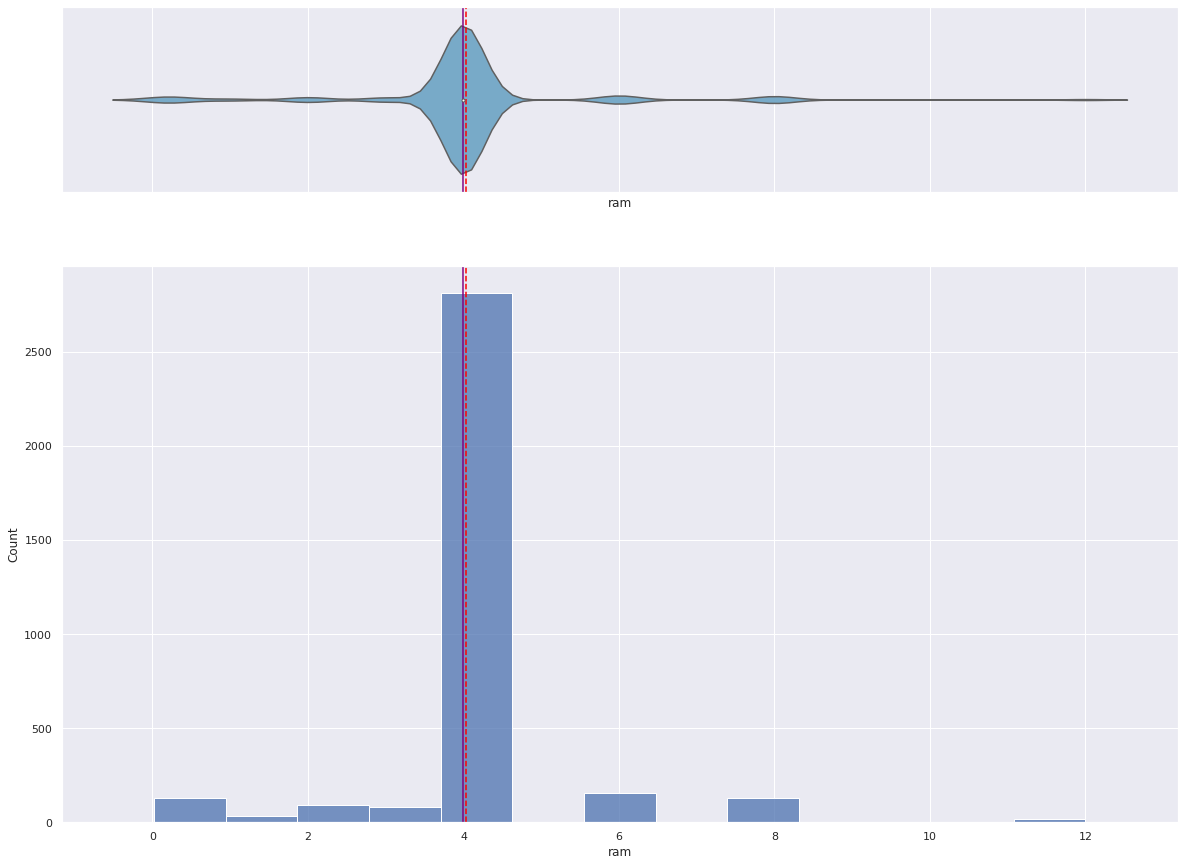

In [ ]:
# plots histogram and violinplot on same graph for ram
histogram_violinplot(data, 'ram')
print(data['ram'].describe()) 



*   The mean of RAM is 4.03 GB and median is 4.00 GB. 


Battery Capacity in mAh 

count    3448.000000
mean     3133.402697
std      1299.682844
min       500.000000
25%      2100.000000
50%      3000.000000
75%      4000.000000
max      9720.000000
Name: battery, dtype: float64


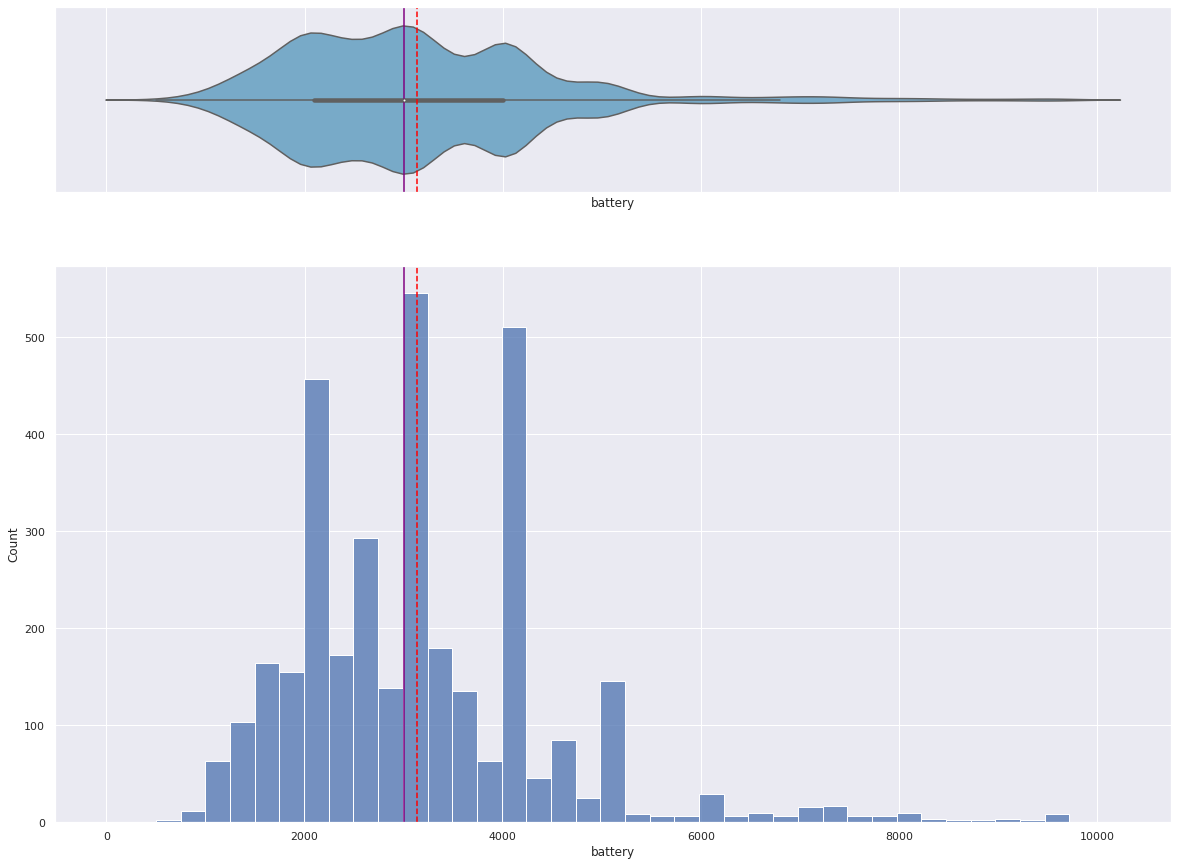

In [ ]:
# plots histogram and violinplot on same graph for battery
histogram_violinplot(data, 'battery')
print(data['battery'].describe()) 



*   The mean of battery is 3133.40 mAh and median is 3000 mAh. The majority of values fall between 2100 mAh and 4000 mAh. 



Weight in Grams 

count    3447.000000
mean      182.751871
std        88.413228
min        69.000000
25%       142.000000
50%       160.000000
75%       185.000000
max       855.000000
Name: weight, dtype: float64


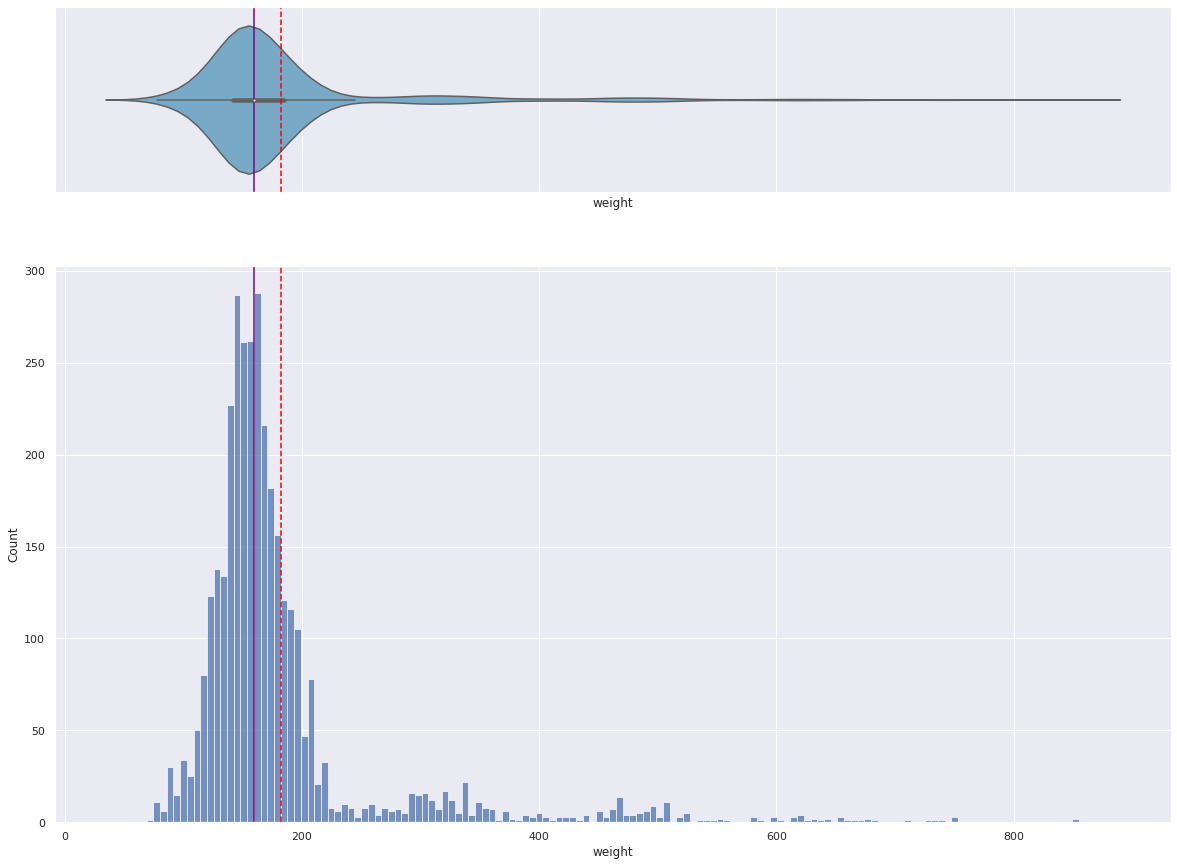

In [ ]:
# plots histogram and violinplot on same graph for weight 
histogram_violinplot(data, 'weight')
print(data['weight'].describe()) 



*   The mean for weight is 182.75 grams and median is 160.00 grams. The majority of values fall between 142.00 and 185.00 grams.


Normalized New Price in Euros 

count    3454.000000
mean        5.233107
std         0.683637
min         2.901422
25%         4.790342
50%         5.245892
75%         5.673718
max         7.847841
Name: normalized_new_price, dtype: float64


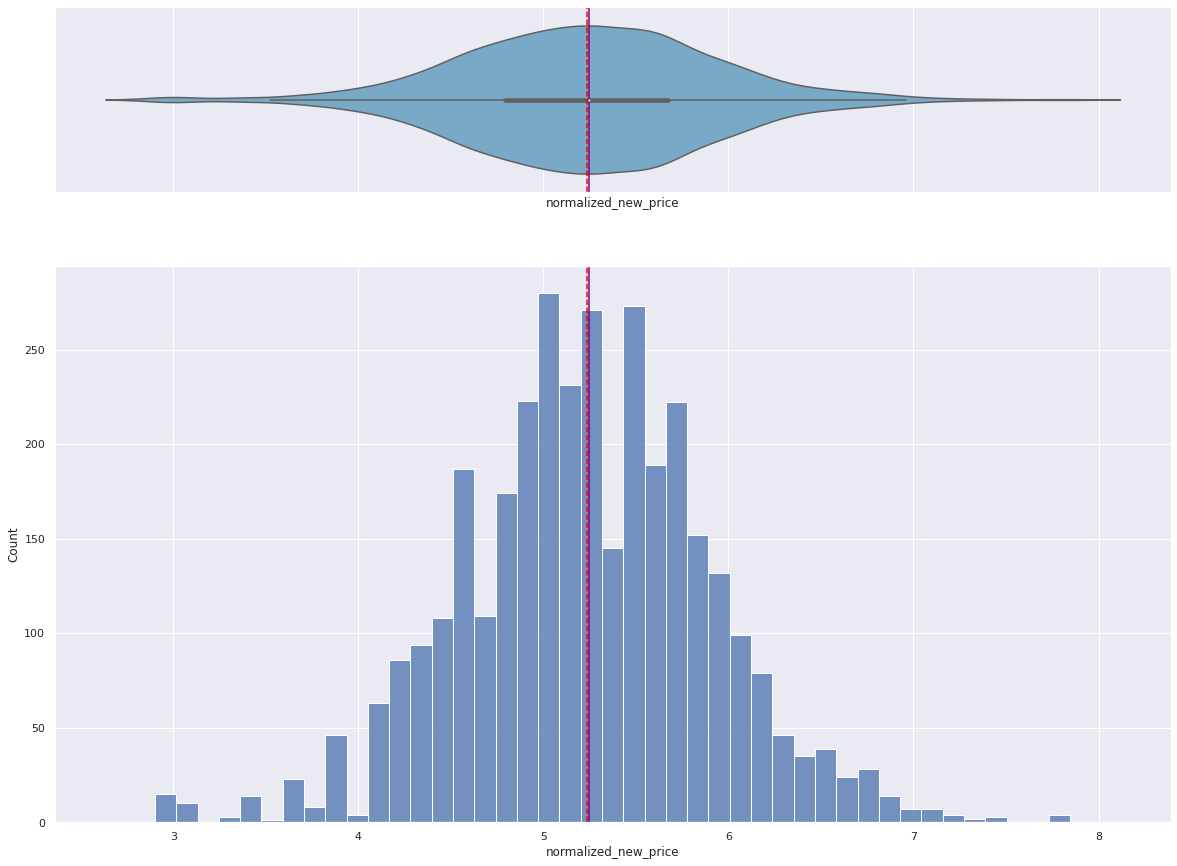

In [ ]:
# plots histogram and violinplot on same graph for normalized_new_price
histogram_violinplot(data, 'normalized_new_price')
print(data['normalized_new_price'].describe()) 




*   The mean for normalized new price is 5.23 euros and median is 5.24. The majority of values fall between 4.79 and 5.67 euros.

Normalized Used Price in Euros 

count    3454.000000
mean        4.364712
std         0.588914
min         1.536867
25%         4.033931
50%         4.405133
75%         4.755700
max         6.619433
Name: normalized_used_price, dtype: float64


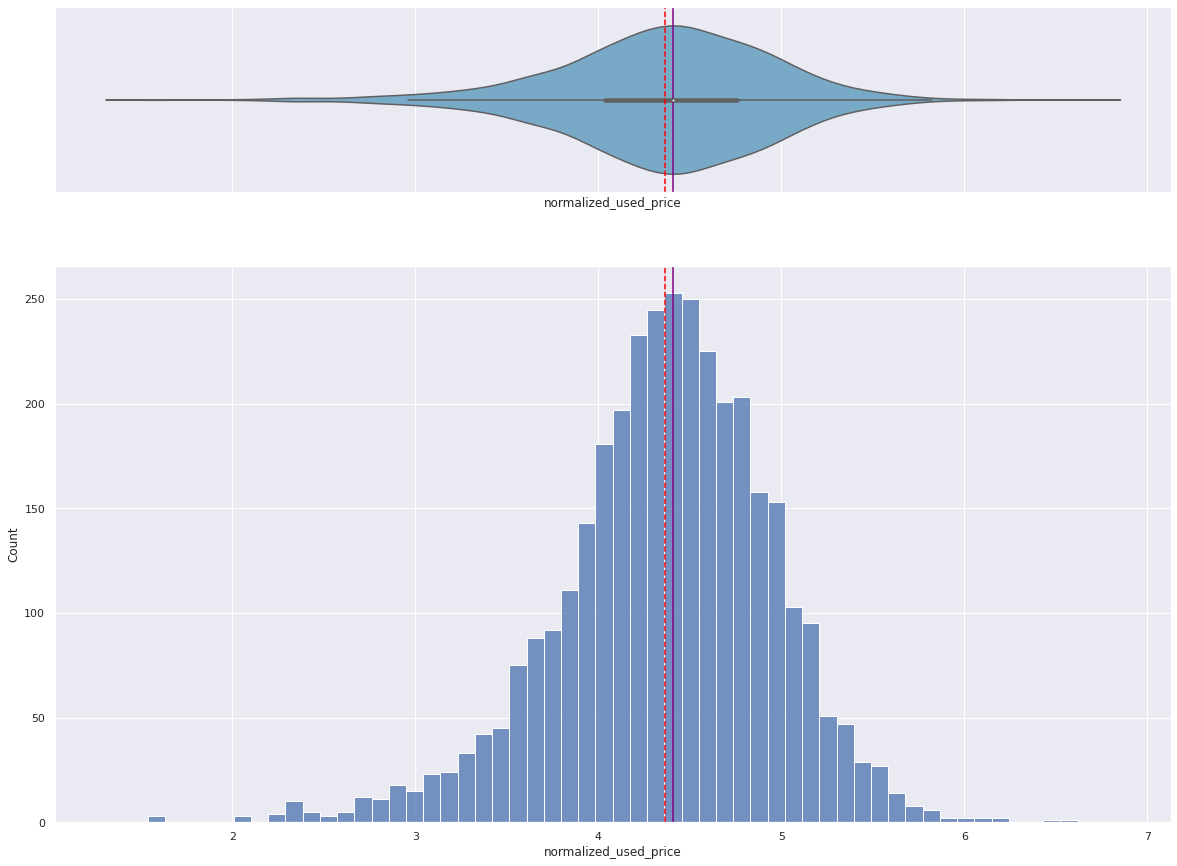

In [ ]:
# plots histogram and violinplot on same graph for normalized_used_price
histogram_violinplot(data, 'normalized_used_price')
print(data['normalized_used_price'].describe()) 



* There is a normal distribution of used price devices. 
* The median is 4.44 and mean is 4.36. 



Days Used

count    3454.000000
mean      674.869716
std       248.580166
min        91.000000
25%       533.500000
50%       690.500000
75%       868.750000
max      1094.000000
Name: days_used, dtype: float64


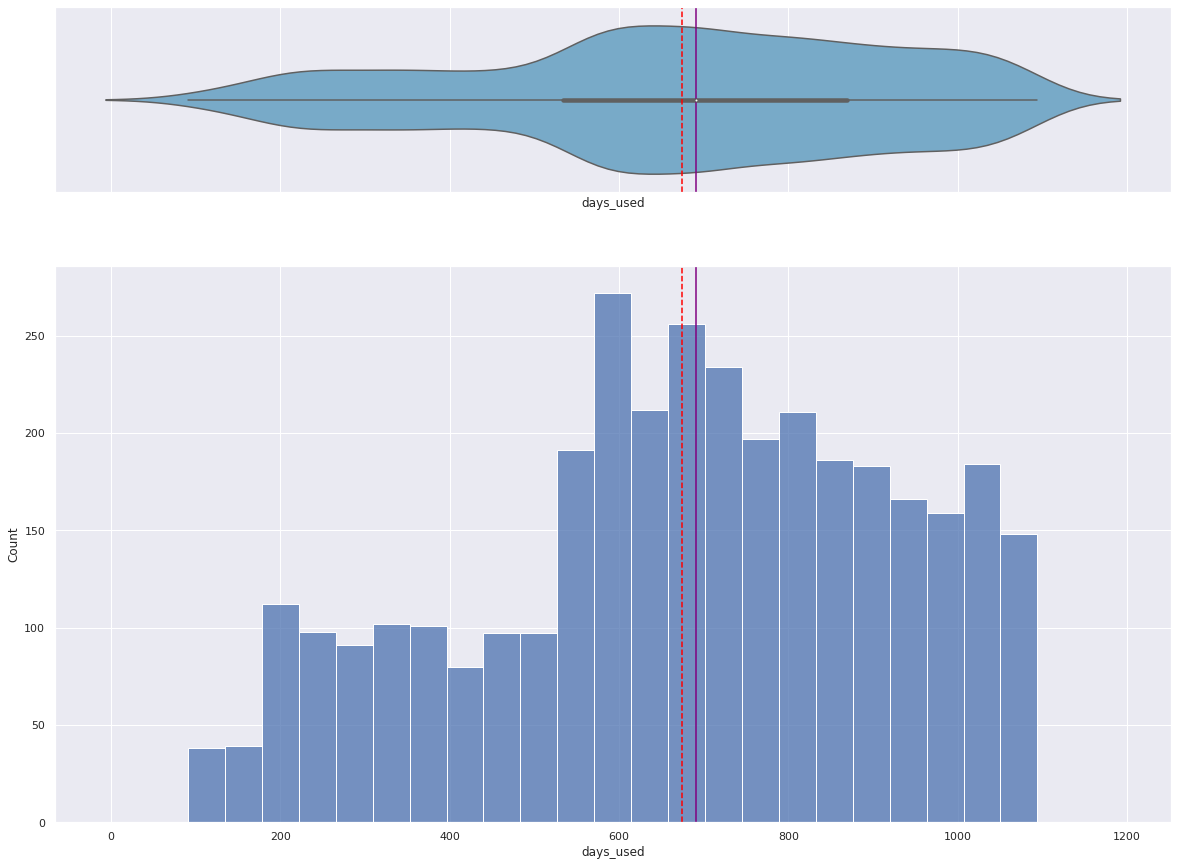

In [ ]:
# plots histogram and violinplot on same graph for days used
histogram_violinplot(data, 'days_used')
print(data['days_used'].describe()) 



*   The mean is 674.86 days and median is 690.50 days.


Brand Name

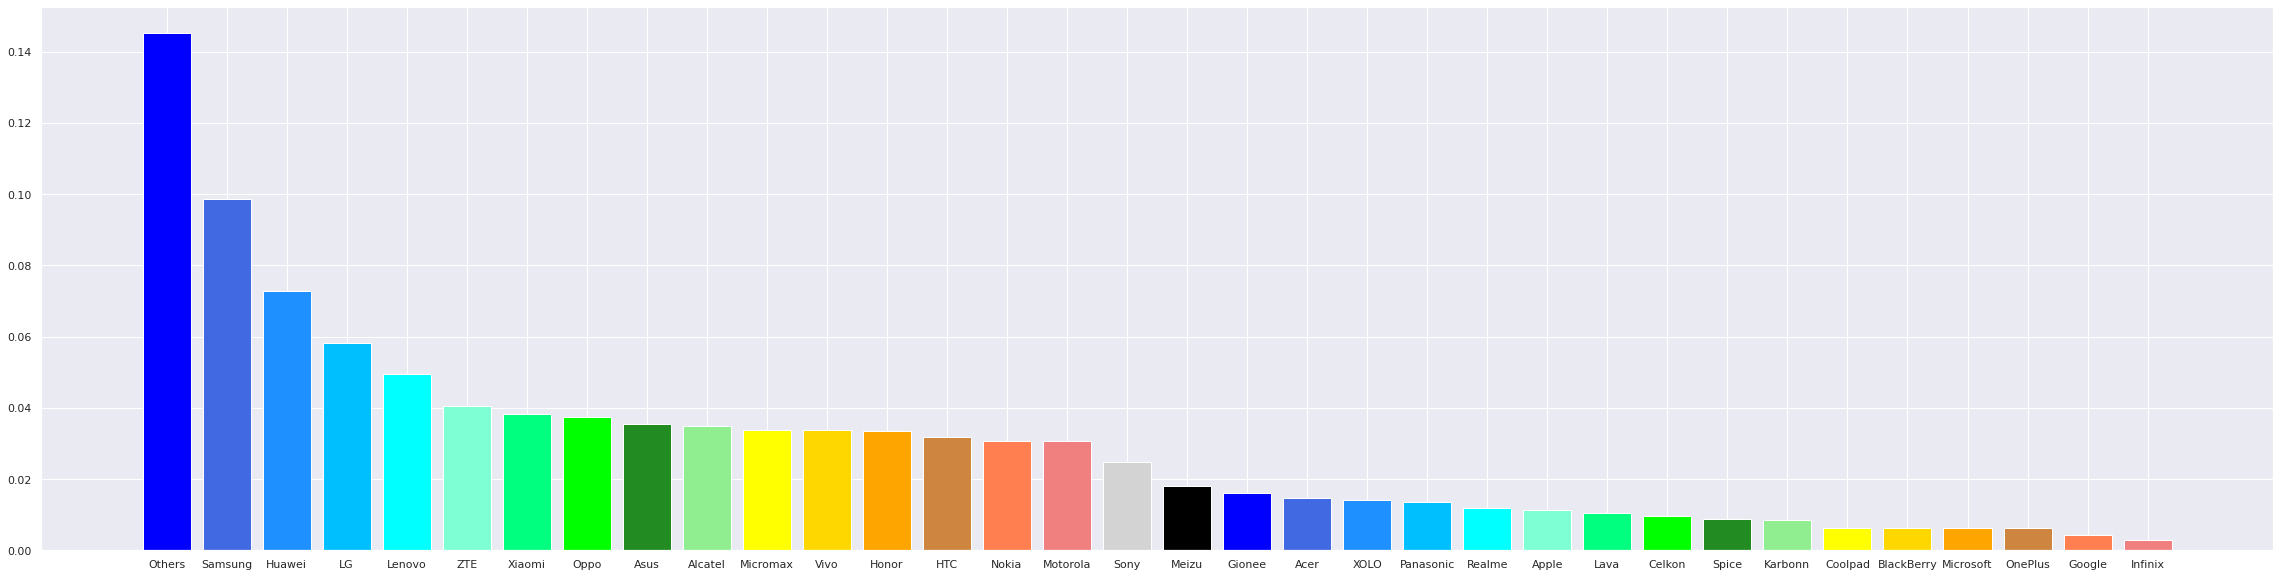

In [ ]:
# plots a percentage barplot to show brand_name percentage
percentage_barplot(data, 'brand_name')



*   The brand name of Others, Samsung, Huawei, and LG account for 502, 341, 251, and 201 counts respectvely. They have the most devices in use for the data.


OS

,Counts,Percentage
Android,3214,0.930515
Others,137,0.039664
Windows,67,0.019398
iOS,36,0.010423


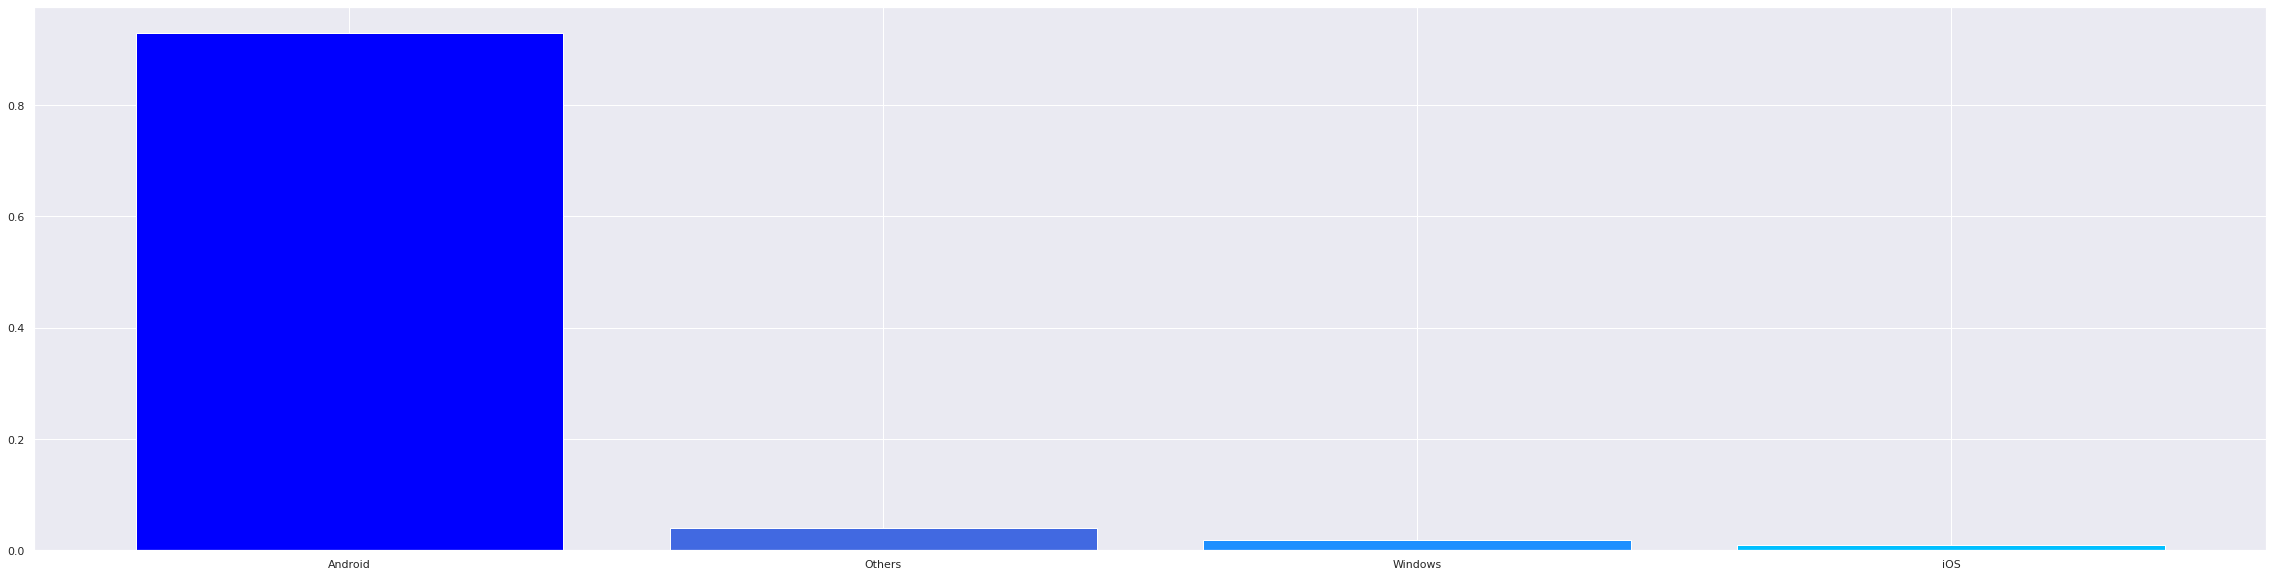

In [ ]:
# plots a percentage barplot to show os percentage
percentage_barplot(data, 'os')



*   Android accounts for 93% of the used device market.



4G

,Counts,Percentage
yes,2335,0.676028
no,1119,0.323972


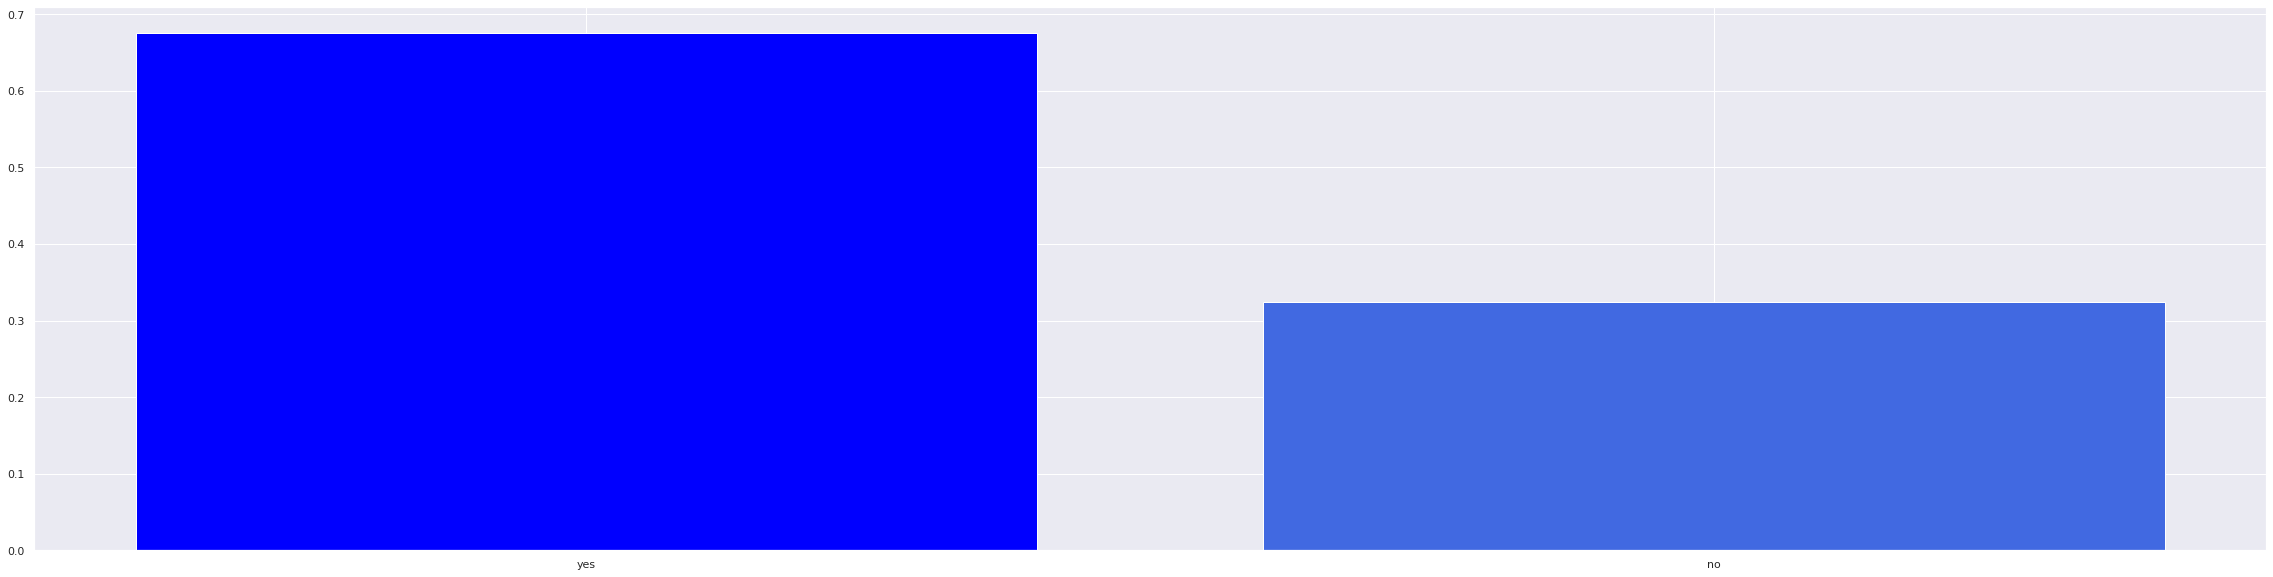

In [ ]:
# plots a percentage barplot to show 4g percentage
percentage_barplot(data, '4g')



*   There are 2335 phones that have 4g availability.

5G

,Counts,Percentage
no,3302,0.955993
yes,152,0.044007


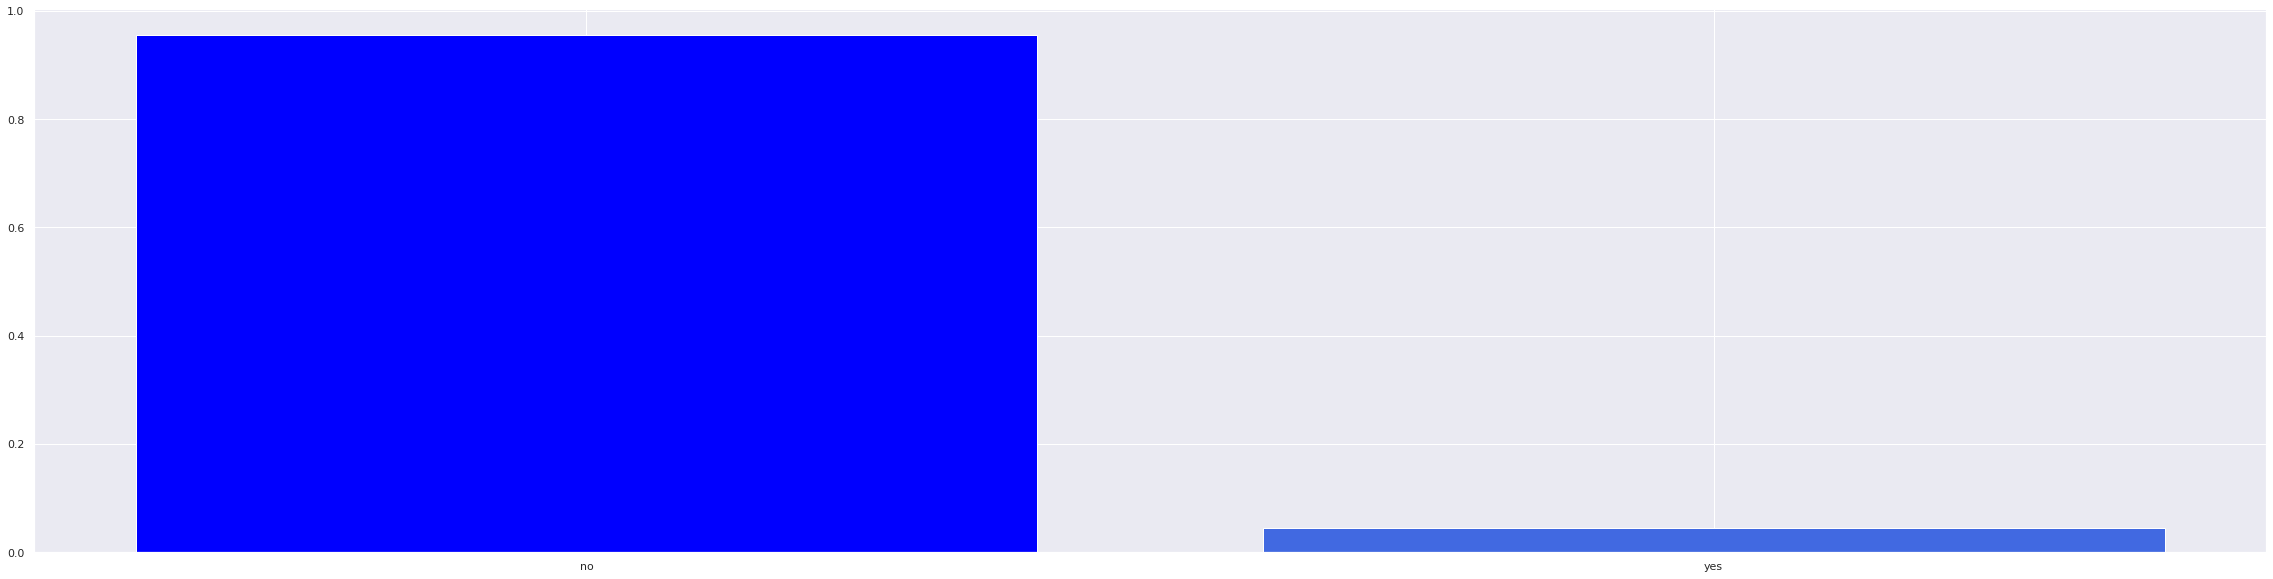

In [ ]:
# plots a percentage barplot to show 5g percentage
percentage_barplot(data, '5g')



*   There are 3302 phones that have 5g availability. 


Release Year

,Counts,Percentage
2014,642,0.185871
2013,570,0.165026
2015,515,0.149102
2019,446,0.129126
2016,383,0.110886
2018,322,0.093225
2017,299,0.086566
2020,277,0.080197


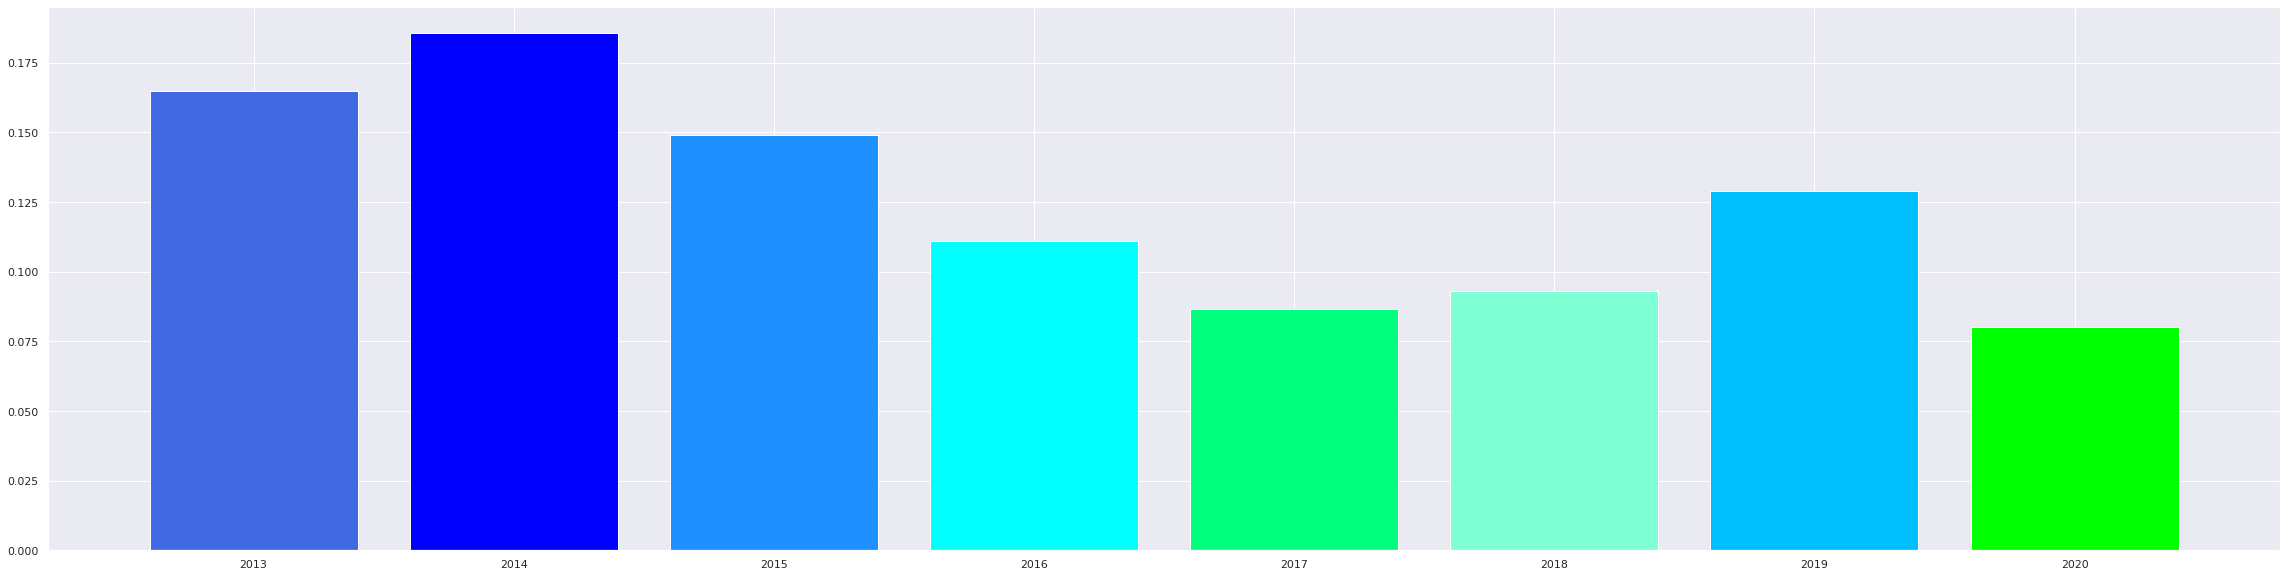

In [ ]:
# plots a percentage barplot to show release_year percentage
percentage_barplot(data, 'release_year')



*   For the data of used devices in 2021, 18.5% are from 2014, 16.5% are from 2013, and around 15% are from 2015. 



**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

RAM and Brand Name

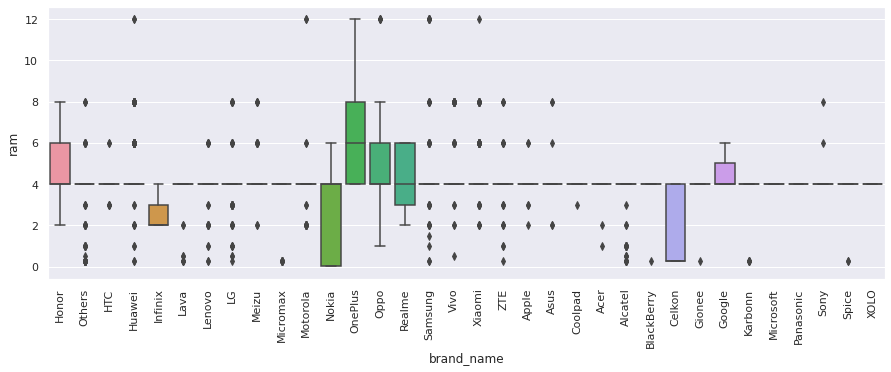

,count,mean,std,min,25%,50%,75%,max
brand_name,,,,,,,,
Acer,51.0,3.901961,0.500196,1.00,4.00,4.00,4.0,4.0
Alcatel,121.0,3.407025,1.263730,0.25,4.00,4.00,4.0,4.0
Apple,39.0,4.000000,0.606977,2.00,4.00,4.00,4.0,6.0
Asus,122.0,4.049180,0.600997,2.00,4.00,4.00,4.0,8.0
BlackBerry,22.0,3.829545,0.799503,0.25,4.00,4.00,4.0,4.0
Celkon,33.0,1.613636,1.831891,0.25,0.25,0.25,4.0,4.0
Coolpad,22.0,3.954545,0.213201,3.00,4.00,4.00,4.0,4.0
Gionee,56.0,3.933036,0.501115,0.25,4.00,4.00,4.0,4.0
Google,15.0,4.533333,0.915475,4.00,4.00,4.00,5.0,6.0


In [ ]:
# plotting relationship between RAM and brand name 
plt.figure(figsize=(15, 5))
sns.boxplot(data=data, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()
data.groupby(['brand_name'])['ram'].describe()



*   The relationship between RAM and brand name is influence by the count of devices that each brand has in the data.
*   With Honor, the mean of the RAM is 4.6 with 25% - 75% of values between 4.0 to 6.0 respectively. 
*   With Nokia, the mean of the RAM is 2.42 with 25% - 75% of values between .03 and 4.0 respectively. 
* With OnePlus, there are only 22 counts with a standard deviation of 2.59. 25% - 75% of values are between 4.0 and 8.0 respectively. 
* Microsoft, Panasonic, and XOLO have 0 standard deviation because all values are 4.0.



Battery (>4500 mAh) and Weight Relationship

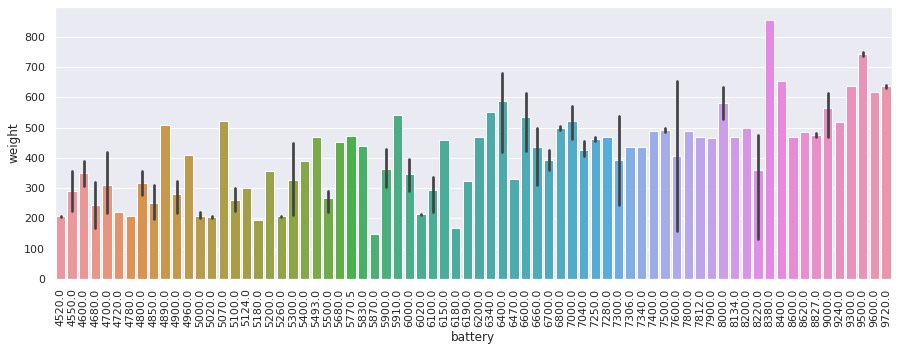

In [ ]:
# plotting relationship between Battery and Weight 
filtered_data_battery_2 = data[data['battery'] > 4500]
plt.figure(figsize=(15, 5))
sns.barplot(data=data, x = filtered_data_battery_2['battery'], y = filtered_data_battery_2['weight'])
plt.xticks(rotation=90)
plt.show()




*   As the battery size increases, visually it shows that the weight also increases.
* Certain battery sizes have more deviation than others such as at 6400,7300, and 8220 mAh. 



Screen Size (6 inches +) and Brand Name

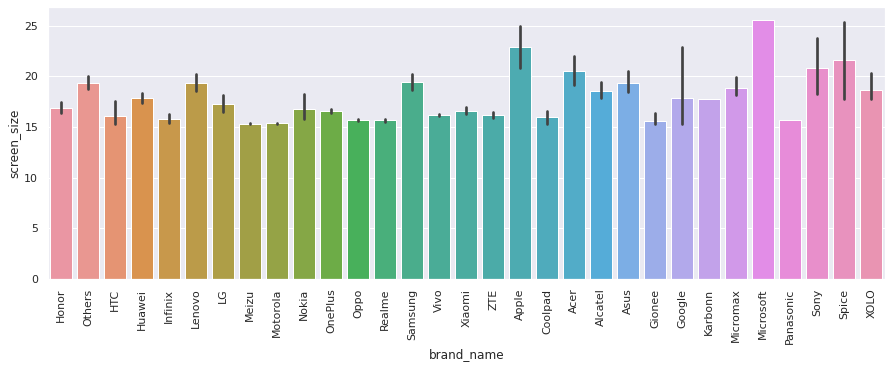

,count,mean,std,min,25%,50%,75%,max
brand_name,,,,,,,,
Acer,19.0,20.495263,3.330501,17.78,17.780,18.010,24.2350,25.43
Alcatel,26.0,18.566538,2.227371,15.29,17.780,17.780,20.3200,25.43
Apple,24.0,22.904167,5.477302,15.27,18.010,23.040,27.9400,30.71
Asus,41.0,19.380488,3.381257,15.29,17.780,17.780,20.3200,25.43
Coolpad,3.0,16.010000,0.661211,15.29,15.720,16.150,16.3700,16.59
Gionee,3.0,15.623333,0.611991,15.27,15.270,15.270,15.8000,16.33
Google,4.0,17.852500,5.065000,15.32,15.320,15.320,17.8525,25.45
HTC,7.0,16.041429,1.988093,15.29,15.290,15.290,15.2900,20.55
Honor,72.0,16.849444,2.401933,15.32,15.470,16.230,16.7400,25.50


In [ ]:
# plotting relationship between Brand Name and Screen Size 
filtered_data_screen_size = data[data['screen_size'] > 6 * 2.54]
plt.figure(figsize=(15, 5))
sns.barplot(data = data, x = filtered_data_screen_size['brand_name'], y = filtered_data_screen_size['screen_size'])
plt.xticks(rotation = 90)
plt.show()
filtered_data_screen_size.groupby(['brand_name'])['screen_size'].describe()



*  There are 1099 devices above 6 inches. 
* Apple and Microsoft offer the largest sized devices, both maxing at 30.71 and 25.55 respectively. 
* Google, Sony, Samsung, and Spice have the largest deviation for their respective sizes.



Selfie Camera (8MP+) and Brand Name

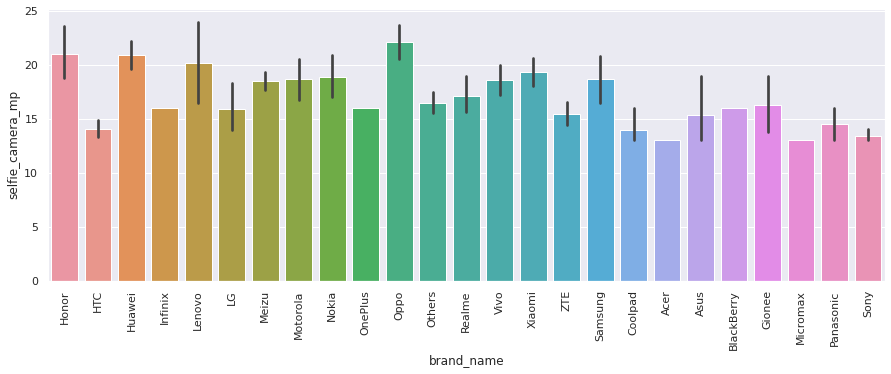

,count,mean,std,min,25%,50%,75%,max
brand_name,,,,,,,,
Acer,1.0,13.000000,NaN,13.0,13.00,13.00,13.00,13.0
Asus,6.0,15.333333,4.412105,13.0,13.00,13.00,15.25,24.0
BlackBerry,2.0,16.000000,0.000000,16.0,16.00,16.00,16.00,16.0
Coolpad,3.0,14.000000,1.732051,13.0,13.00,13.00,14.50,16.0
Gionee,4.0,16.250000,2.872281,13.0,15.25,16.00,17.00,20.0
HTC,20.0,14.100000,1.846761,10.5,13.00,13.75,16.00,16.0
Honor,41.0,21.036585,7.533583,13.0,16.00,16.00,32.00,32.0
Huawei,87.0,20.885057,6.700269,16.0,16.00,16.00,24.00,32.0
Infinix,4.0,16.000000,0.000000,16.0,16.00,16.00,16.00,16.0


In [ ]:
# # plotting relationship between Brand Name and Selfie Camera
filtered_data_selfie_camera_mp = data[data['selfie_camera_mp'] > 8]
plt.figure(figsize=(15, 5))
sns.barplot(data = data, x = filtered_data_selfie_camera_mp['brand_name'], y = filtered_data_selfie_camera_mp['selfie_camera_mp'])
plt.xticks(rotation = 90)
plt.show()
filtered_data_selfie_camera_mp.groupby(['brand_name'])['selfie_camera_mp'].describe()



*   Honor, Lenovo, Samsung, Asus, and Gionee have the highest standard deviation. The counts of devices with selfie cameras greater than 8 are  57 for Samsung, 63 for Xiaomi, 75 for Oppo, and 86 for Huawei. 



Correlation of Variables

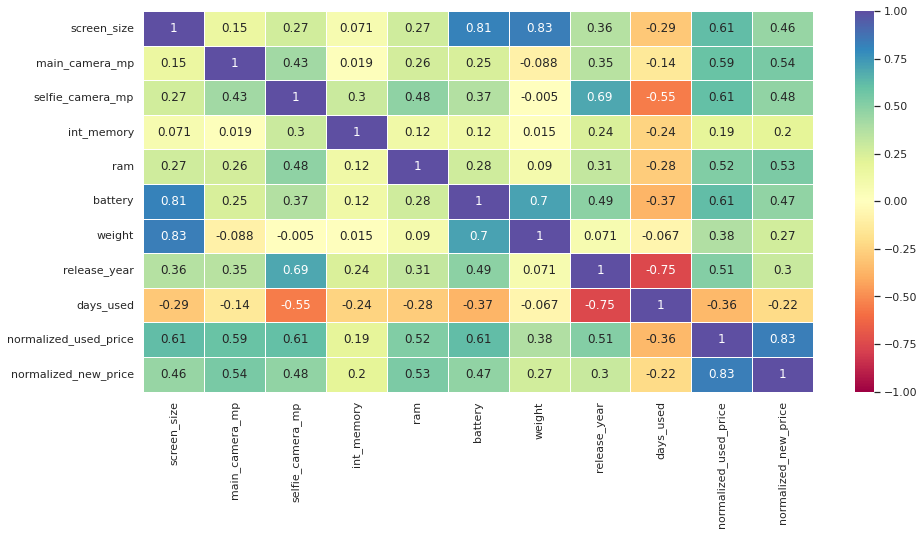

In [ ]:
# getting the correlation of variables 
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2g", cmap="Spectral", linewidths = .5
)
plt.show()



* Screen Size and Battery have a strong correlation at 0.81
* Screen Size and Weight have a strong correlation at 0.83 
* Screen Size and Normalized Used Price have moderate correlation at 0.61
* Main Camera MP and Normalized Used Price have moderate correlation at 0.59
* Main Camera MP and Normalized New Price have moderate correlation at 0.54
* Battery and Normalized Used Price have moderate correlation at 0.61.



Release Year and Normalized Used Price 

<AxesSubplot:xlabel='release_year', ylabel='normalized_used_price'>

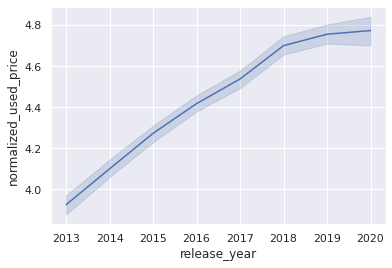

In [ ]:
# plotting release year and normalized used price 
sns.lineplot(
    data = data, x = 'release_year', y = 'normalized_used_price'
    )

* As the years increase, the used price also increases and starts to level out from 2019 and onwards.

Release Year and Normalized New Price

<AxesSubplot:xlabel='release_year', ylabel='normalized_new_price'>

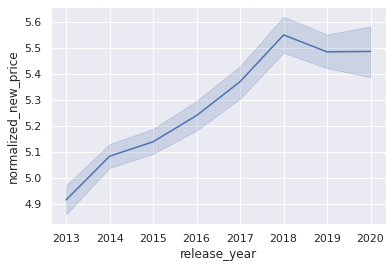

In [ ]:
# plotting release year and normalized new price 
sns.lineplot(
    data = data, x = 'release_year', y = 'normalized_new_price'
    )



* From 2013 to 2014, there is a sharp increase in normalized new price. 
* From 2014 to 2018, there is a gradual increase in normalized new price.
* From 2018 to 2019, there is a drop in price.
* From 2019 to 2020, there is no change in price.


## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# copy the data as best practice 
data_copy = data.copy()

In [ ]:
# checking for null values 
data_copy.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64



*   There are 179 missing values for main_camera_mp, 2 for selfie_camera_mp, 4 for int_memory, 4 for ram, 6 for battery, 7 for weight.



In [ ]:
#impute the missing values with the median, grouping brand_name and release_year

column_names =  [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for column_name in column_names:
  data_copy[column_name] = data_copy[column_name].fillna(value = data_copy.groupby(['brand_name','release_year'])[column_name].transform('median')
  )

data_copy.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* After grouping by brand_name and release year and imputing based on median, there are 179 missing values for main_camera_mp, 2 for selfie_camera_mp, 6 for battery, and 7 for weight. 

In [ ]:
#impute the missing values with the median, grouping on brand_name 

column_names =  [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for column_name in column_names:
  data_copy[column_name] = data_copy[column_name].fillna(value = data_copy.groupby(['brand_name'])[column_name].transform('median')
  )

data_copy.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

* After grouping on brand name and imputing using the median, only 10 missing values for main_camera_mp remain 

In [ ]:
#impute the main_camera_mp 

data_copy["main_camera_mp"] = data_copy["main_camera_mp"].fillna(data_copy["main_camera_mp"].median()) 

data_copy.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

* After imputing the main_camera_mp, there are no more missing values in our data.

In [ ]:
# creating a new column called years_since_release
data_copy["years_since_release"] = 2021 - data_copy["release_year"]
data_copy.drop("release_year", axis=1, inplace=True)
data_copy["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

* The years_since_release has a count of 3454.

In [ ]:
# detects outliers in the data for each column that is numerical data type
column_list = data_copy.select_dtypes(include=np.number).columns.tolist()

for column in column_list: 

    Q1 = np.percentile(data_copy[column], 25,
                      interpolation = 'midpoint')
    
    Q3 = np.percentile(data_copy[column], 75,
                      interpolation = 'midpoint')
    IQR = Q3 - Q1

    upper = data_copy[column] >= (Q3+1.5*IQR)
    
    print("Upper bound:",upper)
    print(np.where(upper))
    
    # Below Lower bound
    lower = data_copy[column] <= (Q1-1.5*IQR)
    print("Lower bound:", lower)
    print(np.where(lower))



Upper bound: 0       False
1       False
2       False
3        True
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453    False
Name: screen_size, Length: 3454, dtype: bool
(array([   3,   19,   20,   21,   31,   33,   36,   40,   49,   50,   51,
         66,   67,   69,   70,   75,   83,  143,  198,  222,  238,  239,
        240,  250,  252,  255,  259,  268,  269,  270,  285,  286,  288,
        289,  294,  302,  366,  368,  371,  373,  374,  376,  379,  382,
        385,  386,  387,  388,  389,  390,  391,  403,  404,  407,  413,
        418,  419,  423,  427,  433,  434,  447,  460,  476,  508,  512,
        525,  526,  612,  614,  633,  634,  642,  644,  645,  649,  653,
        654,  655,  658,  662,  664,  668,  679,  691,  723,  731,  732,
        749,  761,  773,  779,  780,  782,  785,  786,  801,  802,  806,
        811,  874,  925,  992,  993,  994,  996, 1086, 1091, 1116, 1141,
       1142, 1143, 1147, 1151, 1209, 1262, 1263, 1276, 12

* There are outliers for screen size, selfie_camera_mp, int_memory, battery, weight, normalized_used_price, and normalized_new_price.
* We are not going to treat the outliers.

## EDA

- It is a good idea to explore the data once again after manipulating it.

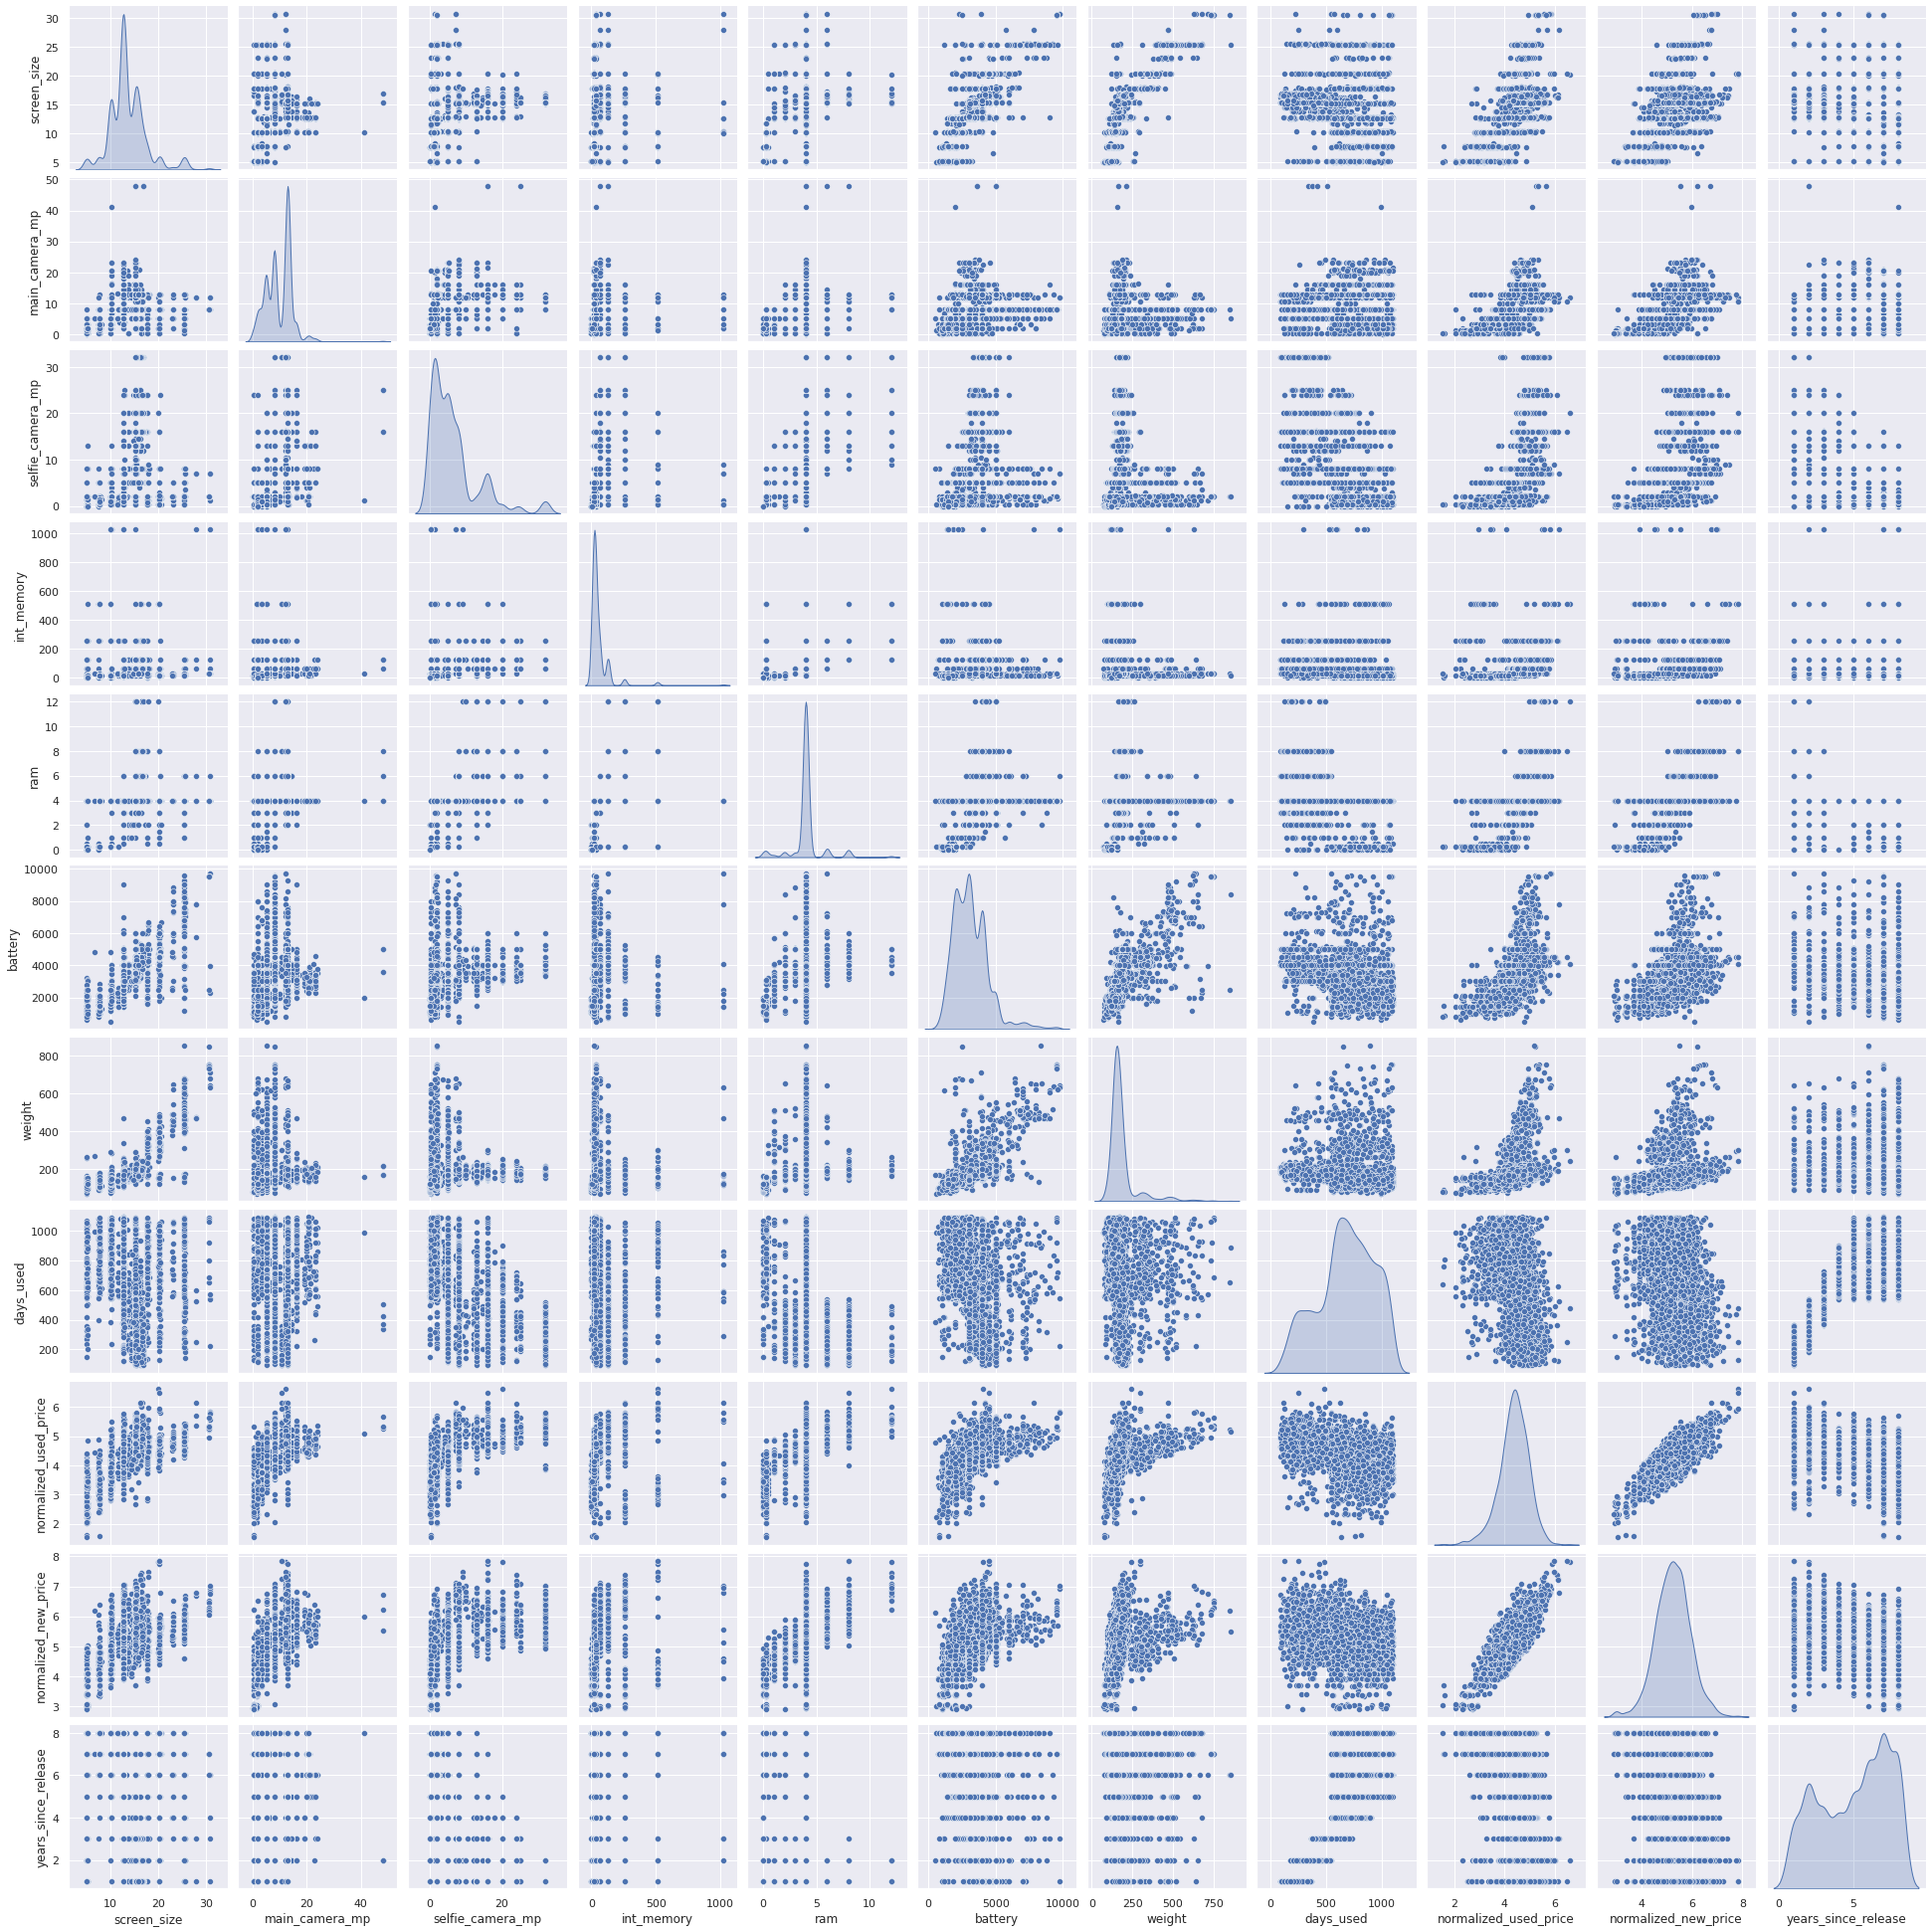

In [ ]:
# using pairplot to see the relationship amongst variables after manipulating it 
sns.pairplot(
    data_copy.iloc[:, 2:], diag_kind="kde"
) 

## Split Data

In [ ]:
# creating dummy variables for 4g 
data_copy = pd.get_dummies(data_copy,columns=['4g'], drop_first=True)  
data_copy.head()

,brand_name,os,screen_size,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release,4g_yes
0,Honor,Android,14.50,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1,1
1,Honor,Android,17.30,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1,1
2,Honor,Android,16.69,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1,1
3,Honor,Android,25.50,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1,1
4,Honor,Android,15.32,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1,1


* Now the categorical variable 4g, which was once yes or no, is now a dummy variable, 1 or 0.

In [ ]:
# creating dummy variables for 5g 
data_copy = pd.get_dummies(data_copy,columns=['5g'], drop_first=True)  
data_copy.head()

,brand_name,os,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release,4g_yes,5g_yes
0,Honor,Android,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1,1,0
1,Honor,Android,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1,1,1
2,Honor,Android,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1,1,1
3,Honor,Android,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1,1,1
4,Honor,Android,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1,1,0


* Now the categorical variable 5g, which was once yes or no, is now a dummy variable, 1 or 0.

In [ ]:
# creating dummy variables for os
data_copy = pd.get_dummies(data_copy,columns=['os'], drop_first=True)  
data_copy.head()

,brand_name,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release,4g_yes,5g_yes,os_Others,os_Windows,os_iOS
0,Honor,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1,1,0,0,0,0
1,Honor,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1,1,1,0,0,0
2,Honor,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1,1,1,0,0,0
3,Honor,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1,1,1,0,0,0
4,Honor,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1,1,0,0,0,0


* Now the categorical variable os, which was once Android, Windows, ios, or Others, is now a dummy variable, 1 or 0.

In [ ]:
# Grouping by brand_name and normalized_new_price median to reset the index and merge backinto the data
new_df = data_copy.groupby(['brand_name'])['normalized_new_price'].median().reset_index()
data_copy = pd.merge(data_copy, new_df, on = 'brand_name', how = 'outer')
data_copy.head()

,brand_name,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price_x,years_since_release,4g_yes,5g_yes,os_Others,os_Windows,os_iOS,normalized_new_price_y
0,Honor,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1,1,0,0,0,0,5.301959
1,Honor,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1,1,1,0,0,0,5.301959
2,Honor,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1,1,1,0,0,0,5.301959
3,Honor,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1,1,1,0,0,0,5.301959
4,Honor,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1,1,0,0,0,0,5.301959


* If we do not take this approach and group by these variables, there will be many dummy variables for each brand. Instead, dividing the joined information into associated price ranges seems to be more efficient. 

In [ ]:
# updating the price to include low, medium, and high to better group data

brandname_low_price = (data_copy['normalized_new_price_y']<5)

brandname_medium_price = (data_copy['normalized_new_price_y']>=5) & (data_copy['normalized_new_price_y']<6)

brandname_high_price = (data_copy['normalized_new_price_y']>=6) 

parameters = [brandname_low_price, brandname_medium_price, brandname_high_price]

range_prices = ['low_price', 'medium_price','high_price']

data_copy['price'] = np.select(parameters, range_prices)
data_copy.head()



,brand_name,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price_x,years_since_release,4g_yes,5g_yes,os_Others,os_Windows,os_iOS,normalized_new_price_y,price
0,Honor,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1,1,0,0,0,0,5.301959,medium_price
1,Honor,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1,1,1,0,0,0,5.301959,medium_price
2,Honor,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1,1,1,0,0,0,5.301959,medium_price
3,Honor,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1,1,1,0,0,0,5.301959,medium_price
4,Honor,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1,1,0,0,0,0,5.301959,medium_price


* After updating price to better group the data, we now see low_price, medium_price, and high_price.

In [ ]:
# creating dummy variables for price
data_copy = pd.get_dummies(
    data_copy,
    columns=['price'],
    drop_first=True,
) 

data_copy.head()

,brand_name,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price_x,years_since_release,4g_yes,5g_yes,os_Others,os_Windows,os_iOS,normalized_new_price_y,price_low_price,price_medium_price
0,Honor,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1,1,0,0,0,0,5.301959,0,1
1,Honor,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1,1,1,0,0,0,5.301959,0,1
2,Honor,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1,1,1,0,0,0,5.301959,0,1
3,Honor,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1,1,1,0,0,0,5.301959,0,1
4,Honor,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1,1,0,0,0,0,5.301959,0,1


* The price column has now been converted into dummy varibles so the data is close to start running regressions. 

In [ ]:
# dropping brand name column
data_copy.drop(['brand_name'], axis = 1, inplace=True)

* Brand name has been dropped since the low, medium, and high price segments show the brand data grouped on price without having so many dummy variables. This will make the data easier to test for regressions.

In [ ]:
# getting the info on data after splitting to ensure correct columns 
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3454 entries, 0 to 3453
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   screen_size             3454 non-null   float64
 1   main_camera_mp          3454 non-null   float64
 2   selfie_camera_mp        3454 non-null   float64
 3   int_memory              3454 non-null   float64
 4   ram                     3454 non-null   float64
 5   battery                 3454 non-null   float64
 6   weight                  3454 non-null   float64
 7   days_used               3454 non-null   int64  
 8   normalized_used_price   3454 non-null   float64
 9   normalized_new_price_x  3454 non-null   float64
 10  years_since_release     3454 non-null   int64  
 11  4g_yes                  3454 non-null   uint8  
 12  5g_yes                  3454 non-null   uint8  
 13  os_Others               3454 non-null   uint8  
 14  os_Windows              3454 non-null   

In [ ]:
#updated pairplot based on dummy variables 
sns.pairplot(
    data_copy.iloc[:, 2:], diag_kind="kde"
) 

In [ ]:
# dropping normalized_new_price_x from the data
data_copy.drop(['normalized_new_price_x'], axis = 1, inplace=True)

In [ ]:
# dropping normalized_new_price_y from the data
data_copy.drop(['normalized_new_price_y'], axis = 1, inplace=True)

In [ ]:
# creating our dependent and independent variable 
X = data_copy.drop(['normalized_used_price'], axis = 1)

y = data_copy['normalized_used_price']




*   We set the values on normalized_used_price to y and dropping from x since we are seeing how certain variables influence the used_price devices on our regression model


In [ ]:
# checking for any null values before the regression 
data_copy.isnull().sum()

screen_size              0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
days_used                0
normalized_used_price    0
years_since_release      0
4g_yes                   0
5g_yes                   0
os_Others                0
os_Windows               0
os_iOS                   0
price_low_price          0
price_medium_price       0
dtype: int64

In [ ]:
# add the intercept to data
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#  splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [ ]:
# checking the number of rows both train and test 
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [ ]:
# fiting to the ols model using training 
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [ ]:
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.747
Model:                               OLS   Adj. R-squared:                  0.745
Method:                    Least Squares   F-statistic:                     442.8
Date:                   Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                           14:28:38   Log-Likelihood:                -467.48
No. Observations:                   2417   AIC:                             969.0
Df Residuals:                       2400   BIC:                             1067.
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons



*   The R-squared value can explain 74.7% of the variance in the training set. 
* An increase of screen size, occurs with a .0418 increase in the used_price.
* An increase of ram, occurs with a .0757 increase in the used_price.
* Having 4g, occurs with a .1918 increase in used_price.
* Being price_low_price, price_medium_price, and os_others decreases the used_price device. 
* If multicollinearity exists, then the model coefficents will change and we will explore the assumptions next.



## Check for Multicollinearity 

In [ ]:
# checking for VIF values 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
) 
print("VIF values: \n\n{}\n".format(vif_series1))


VIF values: 

const                  183.453988
screen_size              6.894259
main_camera_mp           1.743095
selfie_camera_mp         2.488190
int_memory               1.173238
ram                      1.957077
battery                  4.111069
weight                   6.039997
days_used                2.407482
years_since_release      4.197343
4g_yes                   2.133847
5g_yes                   1.681879
os_Others                1.435712
os_Windows               1.031055
os_iOS                   2.023172
price_low_price         12.979873
price_medium_price      13.200725
dtype: float64





*   VIF Values greater than 5 showing moderate multicollinearity are screen_size and weight. 
*   VIF Values greater than 10 showing high multicollinearity are price_low_price and price_medium_price.






In [ ]:
# dropping screen size to see impact on model 
X_train_dropped_variable_2 = X_train.drop(['screen_size'], axis=1)
olsmod_2 = sm.OLS(y_train, X_train_dropped_variable_2)
olsres_2 = olsmod_2.fit()
print(
       "Dropped:",
        'screen_size',
        "\n",
        "R-squared:",
         np.round(olsres_2.rsquared, 3),
         "\nAdjusted R-squared:",
         np.round(olsres_2.rsquared_adj, 3),
         "\n",
        "Difference of Adjusted R-squared: ",
        np.round(olsres.rsquared_adj - olsres_2.rsquared_adj, 3),
        "\n",
        )

Dropped: screen_size 
 R-squared: 0.736 
Adjusted R-squared: 0.734 
 Difference of Adjusted R-squared:  0.011 





*   The adjusted r-squared decreased by 0.011 when dropping screen size.


In [ ]:
# dropping weight to see impact on model 
X_train_dropped_variable_3 = X_train.drop(['weight'], axis=1)
olsmod_3 = sm.OLS(y_train, X_train_dropped_variable_3)
olsres_3 = olsmod_3.fit()
print(
       "Dropped:",
        'weight',
        "\n",
        "R-squared:",
         np.round(olsres_3.rsquared, 3),
         "\nAdjusted R-squared:",
         np.round(olsres_3.rsquared_adj, 3),
         "\n",
        "Difference of Adjusted R-squared: ",
        np.round(olsres.rsquared_adj - olsres_3.rsquared_adj, 3),
        "\n",
        )

Dropped: weight 
 R-squared: 0.743 
Adjusted R-squared: 0.742 
 Difference of Adjusted R-squared:  0.004 



The adjusted r-squared dropped by 0.004 when dropping weight.

In [ ]:
# dropping price low price to see impact on model 
X_train_dropped_variable_4 = X_train.drop(['price_low_price'], axis=1)
olsmod_4 = sm.OLS(y_train, X_train_dropped_variable_4)
olsres_4 = olsmod_4.fit()
print(
       "Dropped:",
        'price_low_price',
        "\n",
        "R-squared:",
         np.round(olsres_4.rsquared, 3),
         "\nAdjusted R-squared:",
         np.round(olsres_4.rsquared_adj, 3),
         "\n",
        "Difference of Adjusted R-squared: ",
        np.round(olsres.rsquared_adj - olsres_4.rsquared_adj, 3),
        "\n",
        )

Dropped: price_low_price 
 R-squared: 0.744 
Adjusted R-squared: 0.742 
 Difference of Adjusted R-squared:  0.003 



The adjusted r-squared dropped by 0.003 when dropping price_low_price.

In [ ]:
# dropping price medium price to see impact on model 
X_train_dropped_variable_5 = X_train.drop(['price_medium_price'], axis=1)
olsmod_5 = sm.OLS(y_train, X_train_dropped_variable_5)
olsres_5 = olsmod_5.fit()
print(
       "Dropped:",
        'price_low_price',
        "\n",
        "R-squared:",
         np.round(olsres_5.rsquared, 3),
         "\nAdjusted R-squared:",
         np.round(olsres_5.rsquared_adj, 3),
         "\n",
        "Difference of Adjusted R-squared: ",
        np.round(olsres.rsquared_adj - olsres_5.rsquared_adj, 3),
        "\n",
        )

Dropped: price_low_price 
 R-squared: 0.745 
Adjusted R-squared: 0.743 
 Difference of Adjusted R-squared:  0.002 





*   The adjusted r-squared dropped by 0.002 when dropping price_medium_price.




In [ ]:
# dropping price medium price to see VIF values
X_train = X_train.drop(['price_medium_price'], axis = 1)

olsmod_6 = sm.OLS(y_train, X_train)
olsred_6 = olsmod_6.fit()

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
) 
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                  84.959403
screen_size             6.882257
main_camera_mp          1.740445
selfie_camera_mp        2.484370
int_memory              1.169542
ram                     1.948046
battery                 4.111055
weight                  6.038714
days_used               2.407297
years_since_release     4.190436
4g_yes                  2.133766
5g_yes                  1.681857
os_Others               1.422841
os_Windows              1.031055
os_iOS                  1.033505
price_low_price         1.253188
dtype: float64





*   After dropping price_medium_price, the VIF for price_low_price has also dropped.



In [ ]:
# dropping weight to see VIF values
X_train = X_train.drop(['weight'], axis = 1)

olsmod_7 = sm.OLS(y_train, X_train)
olsred_7 = olsmod_7.fit()

vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
) 
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                  72.468831
screen_size             3.380982
main_camera_mp          1.678133
selfie_camera_mp        2.445799
int_memory              1.169542
ram                     1.940229
battery                 3.618454
days_used               2.398897
years_since_release     4.003518
4g_yes                  2.116590
5g_yes                  1.678337
os_Others               1.335812
os_Windows              1.029900
os_iOS                  1.025994
price_low_price         1.247995
dtype: float64





* After dropping price weight, all VIF values have fallen under 5.
* Now, we need to drop the variables with  p-values greater than 0.05.



In [ ]:
print(olsred_7.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.741
Model:                               OLS   Adj. R-squared:                  0.740
Method:                    Least Squares   F-statistic:                     491.8
Date:                   Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                           14:30:25   Log-Likelihood:                -493.94
No. Observations:                   2417   AIC:                             1018.
Df Residuals:                       2402   BIC:                             1105.
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons



*   We need to drop days_used since it has a high p-value which means it is not significant.



In [ ]:
# dropping days used on the model 
X_train = X_train.drop(['days_used'], axis = 1)

olsmod_8 = sm.OLS(y_train, X_train)
olsres_8 = olsmod_8.fit()
print(olsres_8.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.741
Model:                               OLS   Adj. R-squared:                  0.740
Method:                    Least Squares   F-statistic:                     529.4
Date:                   Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                           14:30:28   Log-Likelihood:                -494.72
No. Observations:                   2417   AIC:                             1017.
Df Residuals:                       2403   BIC:                             1098.
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons



*   After dropping the values causing multicollinearity and the insignificant ones, the adjusted r-squared has dropped from .745 to .740.



In [ ]:
# looking at VIF values again on the model 
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
) 
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const                  69.839274
screen_size             3.376940
main_camera_mp          1.668813
selfie_camera_mp        2.436130
int_memory              1.167742
ram                     1.938750
battery                 3.618320
years_since_release     2.629859
4g_yes                  2.079132
5g_yes                  1.668134
os_Others               1.332238
os_Windows              1.029900
os_iOS                  1.025992
price_low_price         1.247542
dtype: float64





*   The majority of values are under 3 except for screen_size and battery, but we will leave them in for testing. We have eliminated multicolinearity from the model.



## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.


1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### Linearity & Independence

In [ ]:
# creates dataframe of actual, fitted, and residuals to see linearity and independence
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsres_8.fittedvalues  # predicted values
df_pred["Residuals"] = olsres_8.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.162782,4.016468,0.146314
1525,3.819250,3.960997,-0.141748
1128,4.424847,4.489949,-0.065103
3003,3.961955,4.018302,-0.056347
2907,4.556295,4.386338,0.169957


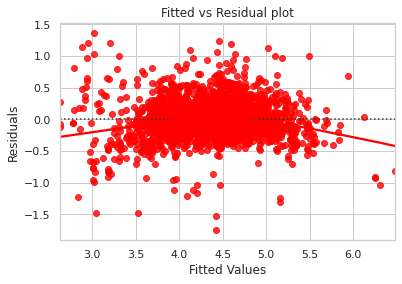

In [ ]:
# graphs the fitted vs residuals 
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="red", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* There is no pattern in the data





### Normality 

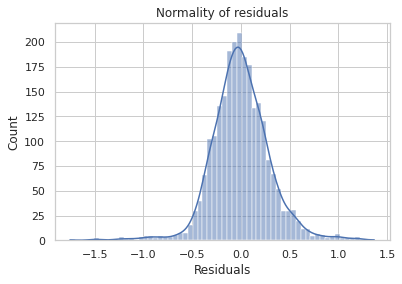

In [ ]:
# graph shows a normal distribution
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()



*   Visually, the residuals are normally distributed.



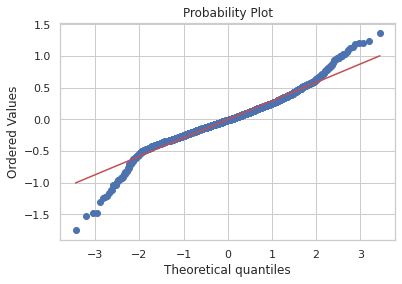

In [ ]:
# plot a QQ plot to show normality 
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()



*   The majority of the points sit on the straight line in the QQ plot, which satisfies the normality assumption.



In [ ]:
# shapiro wilk's test to look for normality 
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9640370011329651, pvalue=4.458320769920734e-24)


* Null: Data is normally distributed
* Alternative: Data is not normally distributed
*   The p-value is less than 0.05, which shows that the residuals are not normal. 
* We will still accept the distribtution close to being normal as an approximation.



### Homoscedasticity

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [ ]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, test)

[('F statistic', 0.8650009076927389), ('p-value', 0.9938684994683942)]


* Null: The residuals are homoscedastic 
* Alternative: The residuals are heteroscedastic
*   Since the p-value is greater than 0.05 and we fail to reject the null. Therefore the residuals are homoscedastic. 



In [ ]:
print(olsres_8.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.741
Model:                               OLS   Adj. R-squared:                  0.740
Method:                    Least Squares   F-statistic:                     529.4
Date:                   Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                           14:30:50   Log-Likelihood:                -494.72
No. Observations:                   2417   AIC:                             1017.
Df Residuals:                       2403   BIC:                             1098.
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons

## Final Model and Performance Check

In [ ]:
X_train.columns 

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp',
       'int_memory', 'ram', 'battery', 'years_since_release', '4g_yes',
       '5g_yes', 'os_Others', 'os_Windows', 'os_iOS', 'price_low_price'],
      dtype='object')

In [ ]:
X_test.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp',
       'int_memory', 'ram', 'battery', 'weight', 'days_used',
       'years_since_release', '4g_yes', '5g_yes', 'os_Others', 'os_Windows',
       'os_iOS', 'price_low_price', 'price_medium_price'],
      dtype='object')

In [ ]:
# Dropped columns from test data that are not in training data 
X_test2 = X_test.drop(
    ["weight", "days_used", "price_medium_price" ], axis=1
)

In [ ]:
# create predictions on the test set
y_pred = olsres_8.predict(X_test2)

In [ ]:
# checks the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

0.29693085507727174

In [ ]:
# checks the RMSE on the test data 
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

0.2944961049646246



*   The RMSE on both the train and test are similar so the model is not suffering from overfitting.



In [ ]:
# checks the MAE on the train data
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae1

0.21782302665004052

In [ ]:
# checks the MAE on the test data 
mae2 = mean_absolute_error(y_test, y_pred)
mae2

0.2222426448757241

* From the MAE, our model can predict normalized_used_price with a mean error of .22 units on the test data.
* The model can explain 74% of the variation in the data.
* The model olsres8 is good for predicting and infering.

In [ ]:
#regression model equation
y_value = 'normalized_used_price = '
print(y_value, end = " ")
print(olsres_8.params[0], " + ")
for i in range(1, len(X_train.columns)):
  print(olsres_8.params[i],
        "* (", 
        X_train.columns[i],
        ")" + " + ", end = " ")
  

normalized_used_price =  2.396440995491012  + 
0.05974293046829456 * ( screen_size ) +  0.03618036668843683 * ( main_camera_mp ) +  0.021229340356444023 * ( selfie_camera_mp ) +  0.0003647239905539755 * ( int_memory ) +  0.07494298990038403 * ( ram ) +  2.1461090455031723e-05 * ( battery ) +  0.030392360362858476 * ( years_since_release ) +  0.1844755643424428 * ( 4g_yes ) +  0.06558243988335981 * ( 5g_yes ) +  -0.04185466582201285 * ( os_Others ) +  0.08127617429415525 * ( os_Windows ) +  0.35293285602311947 * ( os_iOS ) +  -0.09319218259754493 * ( price_low_price ) +  

## Actionable Insights and Recommendations 

* The model can explain 74% of the varation with normalized_used_price.

* Assuming all else constant and a 1 unit increase on the variable: 

  * Screen Size (normalized used price increases by .0597 units)

  * Main Camera (normalized used price increases by .0362 units)

  * Selfie Camera (normalized used price increases by .0212 units)

  * RAM (normalized used price increases by .0749 units)

  * 4G Available (normalized used price increases by .1845 units)

  * 5G Available (normalized used price increases by .0656 units)

  * OS Available (normalized used price increases by .3529 units)

* Normalized used price decreases by .0932 with devices in the price low price range

* As the data scientist for ReCell, I would strongly focus on these variables to infer price for used devices in the market

___